# Loan Defaulting status analysis



## Introduction

### Overall objective

The main purpose of this analysis is to understand what are the reasons for loans getting defaulted. We are looking forward to find the issues, and to suggest solutions based on our findings by the end of this analysis.

### Dataset overview

This dataset contains of data for few of the loan transactions carried out by the bank. The dataset contains of 34 data parameters (including the loan defaulting status). 

- `ID`: Unique identifier for each loan record.
- `year`: Year of loan issuance.
- `loan_limit`: Loan limit category.
- `Gender`: Loan applicant gender.
- `approv_in_adv`: Indicates whether the loan has been pre-approved.
- `loan_type`: Type of loan
- `loan_purpose`: Purpose of the loan.
- `Credit_Worthiness`: The extent to which a person or company is considered suitable for receiving financial credit is often based on its reliability in repaying money in the past.
- `open_credit`: Indicates whether the applicant has other open credits.
- `business_or_commercial`: Whether the loan is for business or commercial.
- `loan_amount`: Total loan amount.
- `rate_of_interest`: Loan interest rate.
- `Interest_rate_spread`: Interest rate spread is the difference between what a bank pays to borrow money and what it charges to lend it, determining its profit margin..
- `Upfront_charges`: Initial charges for the loan.
- `term`: Loan duration in months.
- `Neg_ammortization`: Indicates whether there is negative amortization.
- `interest_only`: Whether the loan allows for interest-only payments.
- `lump_sum_payment`: Indicates whether there is an option to pay in a single installment.
- `property_value`: Value of the property associated with the loan.
- `construction_type`: Type of construction of the property.
- `occupancy_type`: Type of property occupancy.
- `Secured_by`: Type of loan guarantee.
- `total_units`: Number of units related to the loan.
- `income`: Loan applicant's income.
- `credit_type`: Type of credit check used.
- `Credit_Score`: Applicant's credit score.
- `co-applicant_credit_type`: Type of credit check for co-applicants.
- `age`: Age range of the applicant.
- `submission_of_application`: Loan application submission method.
- `LTV` (Loan to Value): Ratio of loan amount to property value.
- `Region`: Geographic region of the loan.
- `Security_Type`: Type of loan security.
- `Status`: Loan Status (1 loan granted, 0 not granted)
- `dtir1` (Debt to Income Ratio): Debt/income ratio of the applicant.

## Setup

In [ ]:
# Importing necessary libraries for this notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from dython.nominal import associations

In [ ]:
# Import the dataset
dataset = pd.read_csv('./datasets/Loan_Default.csv')

In [ ]:
dataset.set_index('ID', inplace=True)

## Dataset inspection

In [ ]:
dataset.shape

(148670, 33)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148670 entries, 24890 to 173559
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       148

In [ ]:
# first ten rows
dataset.head(10)

year loan_limit             Gender approv_in_adv loan_type  \
ID                                                                  
24890  2019         cf  Sex Not Available         nopre     type1   
24891  2019         cf               Male         nopre     type2   
24892  2019         cf               Male           pre     type1   
24893  2019         cf               Male         nopre     type1   
24894  2019         cf              Joint           pre     type1   
24895  2019         cf              Joint           pre     type1   
24896  2019         cf              Joint           pre     type1   
24897  2019        NaN             Female         nopre     type1   
24898  2019         cf              Joint         nopre     type1   
24899  2019         cf  Sex Not Available         nopre     type3   

      loan_purpose Credit_Worthiness open_credit business_or_commercial  \
ID                                                                        
24890           p1                l1        nopc                  nob/c   
24891           p1                l1        nopc                    b/c   
24892           p1                l1        nopc                  nob/c   
24893           p4                l1        nopc                  nob/c   
24894           p1                l1        nopc                  nob/c   
24895           p1                l1        nopc                  nob/c   
24896           p3                l1        nopc                  nob/c   
24897           p4                l1        nopc                  nob/c   
24898           p3                l1        nopc                  nob/c   
24899           p3                l1        nopc                  nob/c   

       loan_amount  ...  credit_type  Credit_Score  co-applicant_credit_type  \
ID                  ...                                                        
24890       116500  ...          EXP           758                       CIB   
24891       206500  ...         EQUI           552                       EXP   
24892       406500  ...          EXP           834                       CIB   
24893       456500  ...          EXP           587                       CIB   
24894       696500  ...         CRIF           602                       EXP   
24895       706500  ...          EXP           864                       EXP   
24896       346500  ...          EXP           860                       EXP   
24897       266500  ...          CIB           863                       CIB   
24898       376500  ...          CIB           580                       EXP   
24899       436500  ...          CIB           788                       EXP   

         age submission_of_application        LTV   Region  Security_Type  \
ID                                                                          
24890  25-34                   to_inst  98.728814    south         direct   
24891  55-64                   to_inst        NaN    North         direct   
24892  35-44                   to_inst  80.019685    south         direct   
24893  45-54                  not_inst  69.376900    North         direct   
24894  25-34                  not_inst  91.886544    North         direct   
24895  35-44                  not_inst  70.089286    North         direct   
24896  55-64                   to_inst  79.109589    North         direct   
24897  55-64                   to_inst  86.525974    North         direct   
24898  55-64                   to_inst  78.765690  central         direct   
24899  55-64                   to_inst  63.444767    south         direct   

      Status dtir1  
ID                  
24890      1  45.0  
24891      1   NaN  
24892      0  46.0  
24893      0  42.0  
24894      0  39.0  
24895      0  40.0  
24896      0  44.0  
24897      0  42.0  
24898      0  44.0  
24899      0  30.0  

[10 rows x 33 columns]

In [ ]:
dataset.tail(10)

year loan_limit             Gender approv_in_adv loan_type  \
ID                                                                   
173550  2019         cf             Female         nopre     type1   
173551  2019         cf  Sex Not Available         nopre     type2   
173552  2019         cf              Joint         nopre     type1   
173553  2019         cf               Male         nopre     type2   
173554  2019         cf              Joint         nopre     type2   
173555  2019         cf  Sex Not Available         nopre     type1   
173556  2019         cf               Male         nopre     type1   
173557  2019         cf               Male         nopre     type1   
173558  2019         cf             Female         nopre     type1   
173559  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
ID                                                                         
173550           p4                l1        nopc                  nob/c   
173551           p4                l1        nopc                    b/c   
173552           p4                l1        nopc                  nob/c   
173553           p1                l1        nopc                    b/c   
173554           p1                l1        nopc                    b/c   
173555           p3                l1        nopc                  nob/c   
173556           p1                l1        nopc                  nob/c   
173557           p4                l1        nopc                  nob/c   
173558           p4                l1        nopc                  nob/c   
173559           p3                l1        nopc                  nob/c   

        loan_amount  ...  credit_type  Credit_Score  co-applicant_credit_type  \
ID                   ...                                                        
173550       366500  ...          CIB           851                       EXP   
173551       346500  ...          EXP           585                       CIB   
173552       646500  ...          CIB           873                       EXP   
173553       106500  ...         EQUI           619                       EXP   
173554       156500  ...          EXP           859                       EXP   
173555       436500  ...          CIB           659                       EXP   
173556       586500  ...          CIB           569                       CIB   
173557       446500  ...          CIB           702                       EXP   
173558       196500  ...          EXP           737                       EXP   
173559       406500  ...          CIB           830                       CIB   

          age submission_of_application        LTV   Region  Security_Type  \
ID                                                                           
173550  45-54                  not_inst  55.699088    North         direct   
173551  25-34                   to_inst  96.787710    south         direct   
173552  45-54                  not_inst  78.079710    North         direct   
173553    <25                   to_inst        NaN    North         direct   
173554  65-74                   to_inst  99.050633  central         direct   
173555  55-64                   to_inst  71.792763    south         direct   
173556  25-34                  not_inst  74.428934    south         direct   
173557  45-54                  not_inst  61.332418    North         direct   
173558  55-64                   to_inst  70.683453    North         direct   
173559  45-54                  not_inst  72.849462    North         direct   

       Status dtir1  
ID                   
173550      0  20.0  
173551      1   NaN  
173552      0  31.0  
173553      1   NaN  
173554      0  45.0  
173555      0  48.0  
173556      0  15.0  
173557      0  49.0  
173558      0  29.0  
173559      0  44.0  

[10 rows x 33 columns]

In [ ]:
dataset.dtypes

year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object
s

In [ ]:
dataset.describe()

year   loan_amount  rate_of_interest  Interest_rate_spread  \
count  148670.0  1.486700e+05     112231.000000         112031.000000   
mean     2019.0  3.311177e+05          4.045476              0.441656   
std         0.0  1.839093e+05          0.561391              0.513043   
min      2019.0  1.650000e+04          0.000000             -3.638000   
25%      2019.0  1.965000e+05          3.625000              0.076000   
50%      2019.0  2.965000e+05          3.990000              0.390400   
75%      2019.0  4.365000e+05          4.375000              0.775400   
max      2019.0  3.576500e+06          8.000000              3.357000   

       Upfront_charges           term  property_value         income  \
count    109028.000000  148629.000000    1.335720e+05  139520.000000   
mean       3224.996127     335.136582    4.978935e+05    6957.338876   
std        3251.121510      58.409084    3.599353e+05    6496.586382   
min           0.000000      96.000000    8.000000e+03       0.000000   
25%         581.490000     360.000000    2.680000e+05    3720.000000   
50%        2596.450000     360.000000    4.180000e+05    5760.000000   
75%        4812.500000     360.000000    6.280000e+05    8520.000000   
max       60000.000000     360.000000    1.650800e+07  578580.000000   

        Credit_Score            LTV         Status          dtir1  
count  148670.000000  133572.000000  148670.000000  124549.000000  
mean      699.789103      72.746457       0.246445      37.732932  
std       115.875857      39.967603       0.430942      10.545435  
min       500.000000       0.967478       0.000000       5.000000  
25%       599.000000      60.474860       0.000000      31.000000  
50%       699.000000      75.135870       0.000000      39.000000  
75%       800.000000      86.184211       0.000000      45.000000  
max       900.000000    7831.250000       1.000000      61.000000

In [ ]:
print('Classes in:')
for row in dataset.dtypes.items():
  if row[1] == 'object':
    print(f'\t\033[1m{row[0]}\033[0m: \n\t\t{dataset[row[0]].unique()}')

Classes in:
	loan_limit: 
		['cf' nan 'ncf']
	Gender: 
		['Sex Not Available' 'Male' 'Joint' 'Female']
	approv_in_adv: 
		['nopre' 'pre' nan]
	loan_type: 
		['type1' 'type2' 'type3']
	loan_purpose: 
		['p1' 'p4' 'p3' 'p2' nan]
	Credit_Worthiness: 
		['l1' 'l2']
	open_credit: 
		['nopc' 'opc']
	business_or_commercial: 
		['nob/c' 'b/c']
	Neg_ammortization: 
		['not_neg' 'neg_amm' nan]
	interest_only: 
		['not_int' 'int_only']
	lump_sum_payment: 
		['not_lpsm' 'lpsm']
	construction_type: 
		['sb' 'mh']
	occupancy_type: 
		['pr' 'sr' 'ir']
	Secured_by: 
		['home' 'land']
	total_units: 
		['1U' '2U' '3U' '4U']
	credit_type: 
		['EXP' 'EQUI' 'CRIF' 'CIB']
	co-applicant_credit_type: 
		['CIB' 'EXP']
	age: 
		['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
	submission_of_application: 
		['to_inst' 'not_inst' nan]
	Region: 
		['south' 'North' 'central' 'North-East']
	Security_Type: 
		['direct' 'Indriect']


## Data cleaning & preparation


### Initial preparation
First, let's rename all the columns to simple case as there was no standard convention maintained in every column name 

In [ ]:
rename_dict = {col: col.lower() for col in dataset.columns}
dataset.rename(columns=rename_dict, inplace=True)

### Handling missing data
- This is the overview of the missing data in this dataset:

In [ ]:
miss_df = pd.DataFrame((dataset.isna().sum()))
miss_df.rename(columns={0: 'Missing count'}, inplace=True)
miss_df['Percentage from total'] = miss_df['Missing count'].apply(lambda x: f'{(x*100)/dataset.shape[0]: .2f}%')
miss_df

Missing count Percentage from total
year                                   0                 0.00%
loan_limit                          3344                 2.25%
gender                                 0                 0.00%
approv_in_adv                        908                 0.61%
loan_type                              0                 0.00%
loan_purpose                         134                 0.09%
credit_worthiness                      0                 0.00%
open_credit                            0                 0.00%
business_or_commercial                 0                 0.00%
loan_amount                            0                 0.00%
rate_of_interest                   36439                24.51%
interest_rate_spread               36639                24.64%
upfront_charges                    39642                26.66%
term                                  41                 0.03%
neg_ammortization                    121                 0.08%
interest_only                          0                 0.00%
lump_sum_payment                       0                 0.00%
property_value                     15098                10.16%
construction_type                      0                 0.00%
occupancy_type                         0                 0.00%
secured_by                             0                 0.00%
total_units                            0                 0.00%
income                              9150                 6.15%
credit_type                            0                 0.00%
credit_score                           0                 0.00%
co-applicant_credit_type               0                 0.00%
age                                  200                 0.13%
submission_of_application            200                 0.13%
ltv                                15098                10.16%
region                                 0                 0.00%
security_type                          0                 0.00%
status                                 0                 0.00%
dtir1                              24121                16.22%

In [ ]:
dataset

year loan_limit             gender approv_in_adv loan_type  \
ID                                                                   
24890   2019         cf  Sex Not Available         nopre     type1   
24891   2019         cf               Male         nopre     type2   
24892   2019         cf               Male           pre     type1   
24893   2019         cf               Male         nopre     type1   
24894   2019         cf              Joint           pre     type1   
...      ...        ...                ...           ...       ...   
173555  2019         cf  Sex Not Available         nopre     type1   
173556  2019         cf               Male         nopre     type1   
173557  2019         cf               Male         nopre     type1   
173558  2019         cf             Female         nopre     type1   
173559  2019         cf             Female         nopre     type1   

       loan_purpose credit_worthiness open_credit business_or_commercial  \
ID                                                                         
24890            p1                l1        nopc                  nob/c   
24891            p1                l1        nopc                    b/c   
24892            p1                l1        nopc                  nob/c   
24893            p4                l1        nopc                  nob/c   
24894            p1                l1        nopc                  nob/c   
...             ...               ...         ...                    ...   
173555           p3                l1        nopc                  nob/c   
173556           p1                l1        nopc                  nob/c   
173557           p4                l1        nopc                  nob/c   
173558           p4                l1        nopc                  nob/c   
173559           p3                l1        nopc                  nob/c   

        loan_amount  ...  credit_type  credit_score  co-applicant_credit_type  \
ID                   ...                                                        
24890        116500  ...          EXP           758                       CIB   
24891        206500  ...         EQUI           552                       EXP   
24892        406500  ...          EXP           834                       CIB   
24893        456500  ...          EXP           587                       CIB   
24894        696500  ...         CRIF           602                       EXP   
...             ...  ...          ...           ...                       ...   
173555       436500  ...          CIB           659                       EXP   
173556       586500  ...          CIB           569                       CIB   
173557       446500  ...          CIB           702                       EXP   
173558       196500  ...          EXP           737                       EXP   
173559       406500  ...          CIB           830                       CIB   

          age submission_of_application        ltv region  security_type  \
ID                                                                         
24890   25-34                   to_inst  98.728814  south         direct   
24891   55-64                   to_inst        NaN  North         direct   
24892   35-44                   to_inst  80.019685  south         direct   
24893   45-54                  not_inst  69.376900  North         direct   
24894   25-34                  not_inst  91.886544  North         direct   
...       ...                       ...        ...    ...            ...   
173555  55-64                   to_inst  71.792763  south         direct   
173556  25-34                  not_inst  74.428934  south         direct   
173557  45-54                  not_inst  61.332418  North         direct   
173558  55-64                   to_inst  70.683453  North         direct   
173559  45-54                  not_inst  72.849462  North         direct   

       status dtir1  
ID                   
24890       1  45.0  

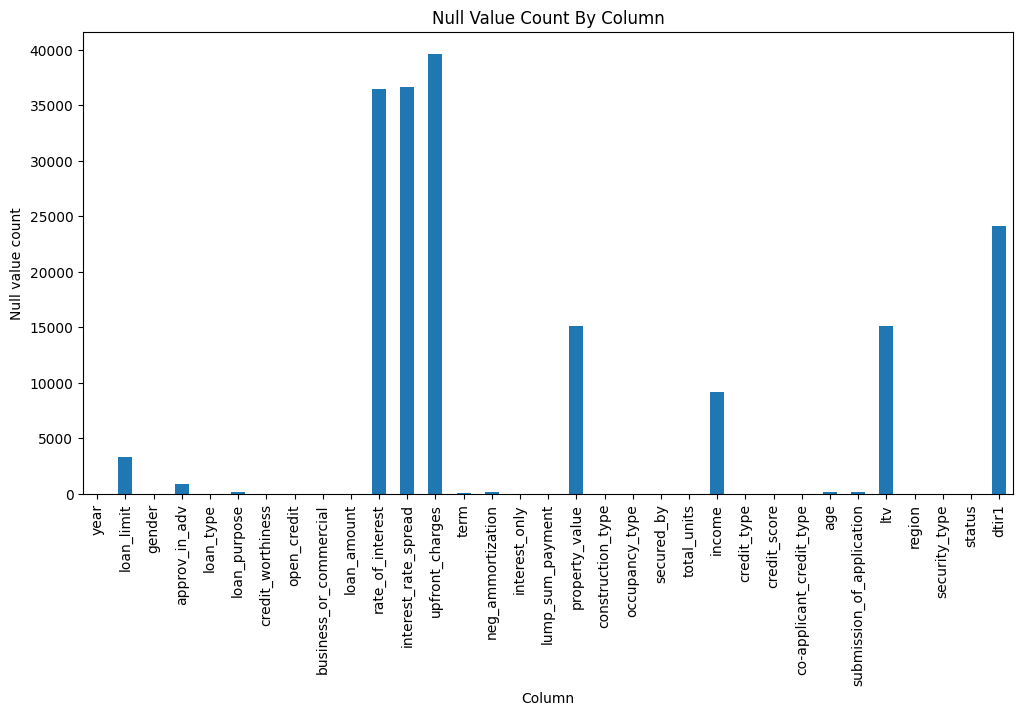

In [ ]:
# plot null value count
plt.figure(figsize=(12, 6))
dataset.isnull().sum().plot.bar()
plt.title('Null Value Count By Column')
plt.xlabel('Column')
plt.ylabel('Null value count')
plt.xticks(rotation = 90)
plt.show()

<Axes: ylabel='ID'>

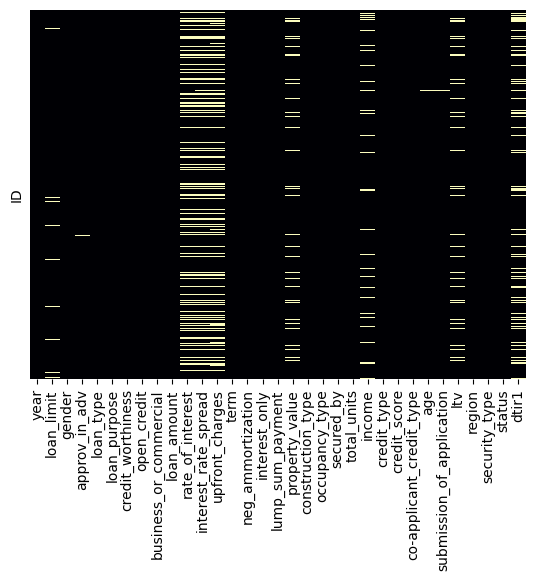

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False, cmap='magma')

In [ ]:
dataset[dataset['status'] == 1].count()

year                         36639
loan_limit                   35758
gender                       36639
approv_in_adv                36398
loan_type                    36639
loan_purpose                 36604
credit_worthiness            36639
open_credit                  36639
business_or_commercial       36639
loan_amount                  36639
rate_of_interest               200
interest_rate_spread             0
upfront_charges                153
term                         36624
neg_ammortization            36607
interest_only                36639
lump_sum_payment             36639
property_value               21543
construction_type            36639
occupancy_type               36639
secured_by                   36639
total_units                  36639
income                       35400
credit_type                  36639
credit_score                 36639
co-applicant_credit_type     36639
age                          36439
submission_of_application    36439
ltv                 

In [ ]:
# checking for unique values
dataset.nunique().sum

<bound method Series.sum of year                             1
loan_limit                       2
gender                           4
approv_in_adv                    2
loan_type                        3
loan_purpose                     4
credit_worthiness                2
open_credit                      2
business_or_commercial           2
loan_amount                    211
rate_of_interest               131
interest_rate_spread         22516
upfront_charges              58271
term                            26
neg_ammortization                2
interest_only                    2
lump_sum_payment                 2
property_value                 385
construction_type                2
occupancy_type                   3
secured_by                       2
total_units                      4
income                        1001
credit_type                      4
credit_score                   401
co-applicant_credit_type         2
age                              7
submission_of_application  

#### Loan limit feature(`loan_limit`)
- The feature contains of null values in 3344 records (approximately 2.25% from the whole dataset).
- So, for this we can consider leaving the null values labeled as 'unknown' for the moment.  

In [ ]:
# Label null values
dataset['loan_limit'] = dataset['loan_limit'].fillna('unknown')

In [ ]:
# Verify the process
dataset['loan_limit'].unique()

array(['cf', 'unknown', 'ncf'], dtype=object)

#### Approved in advance feature(`approv_in_adv`)
- This feature contains null values in 908 records (approximately 0.61% of the whole dataset).
- So, for this we can consider leaving the null values labeled as 'unknown' for the moment.

In [ ]:
# Label null values
dataset['approv_in_adv'] = dataset['approv_in_adv'].fillna('unknown')

In [ ]:
# Verify the process
dataset['approv_in_adv'].unique()

array(['nopre', 'pre', 'unknown'], dtype=object)

#### Loan purpose feature(`loan_purpose`)
- This feature contains null values in 134 records (approximately 0.09% of the whole dataset).
- So, for this we can consider leaving the null values labeled as 'unknown' for the moment.

In [ ]:
# Label null values
dataset['loan_purpose'] = dataset['loan_purpose'].fillna('unknown')

In [ ]:
# Verify the process
dataset['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2', 'unknown'], dtype=object)

#### Interest rate spread feature(`interest_rate_spread`)
- This feature contains null values in 36,639 records (approximately 24.64% of the whole dataset).
- To understand why this feature is not needed for this analysis, first we need to understand what this feature means. The interest spread rate is the difference between the interest rate charged on the loan and the cost of funds to the bank.
- So, we'll be **dropping** this feature as it's not needed for this analysis considering that this feature is very unlikely to bother the fact that the borowwer will default the loan. 

In [ ]:
# Drop the interest_rate_spread feature
dataset.drop(columns=['interest_rate_spread'], inplace=True)

In [ ]:
# Verify the process
try:
    dataset['interest_rate_spread']
    print('Failed to drop!')
except KeyError:
    print('Have dropped successfully!')

Have dropped successfully!


#### Rate of interest feature(`rate_of_interest`)
- This feature contains null values in 36,439 records (approximately 24.51% of the whole dataset).
- This feature is a very crucial feature for the analysis, but also when we noticed that the records with missing interest rates has a huge quota of the total records with 'defaulted' status, So removing records with missing values will lead to a bias analysis.
- Due to this reason, the only option left is to remove the whole feature itself.

In [ ]:
calc_data = (len(dataset[dataset['rate_of_interest'].isna() & (dataset['status'] == 1)])/len(dataset[dataset['status'] == 1]))*100.0
print(f"Percentage of records with null interest rates and 'defaulted' status out of records with 'defaulted' status:  \033[1m{calc_data :.3f}%")

Percentage of records with null interest rates and 'defaulted' status out of records with 'defaulted' status:  99.454%


In [ ]:
# Removing null values from rate_of_interest
dataset.drop(columns=['rate_of_interest'], inplace=True)

In [ ]:
# Verify the process
try:
    dataset['rate_of_interest']
    print('Failed to drop!')
except KeyError:
    print('Have dropped successfully!')

Have dropped successfully!


In [ ]:
# Verify the process
dataset.isnull().sum()

year                             0
loan_limit                       0
gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                          15098
region                           0
security_type       

**Note:** there is more 112,000+ rows therefore we can still remove columns because there is many rows we could not replace by other columns such as dtirl and 

#### Initial fee for the loan feature(`upfront_charges`)
- We have calculated a percentage value of a upfront_charges column from the loan amount column so we can get an idea from that. then after we are getting 

In [ ]:
dist_data = pd.DataFrame()
dist_data = pd.concat([dist_data, dataset[['upfront_charges', 'loan_amount']]], axis=1)
dist_data['Percentage'] = (dataset['upfront_charges'] / dataset['loan_amount']) * 100
dist_data.describe()

upfront_charges   loan_amount     Percentage
count    109028.000000  1.486700e+05  109028.000000
mean       3224.996127  3.311177e+05       1.237833
std        3251.121510  1.839093e+05       1.127166
min           0.000000  1.650000e+04       0.000000
25%         581.490000  1.965000e+05       0.154624
50%        2596.450000  2.965000e+05       0.992935
75%        4812.500000  4.365000e+05       2.136293
max       60000.000000  3.576500e+06       5.930581

In [ ]:
missing_ids = dataset[dataset['upfront_charges'].isna()].index
percent_mean = dist_data['Percentage'].mean()*0.01
test_dataset = dataset.copy()
test_dataset['upfront_charges'].fillna(test_dataset['loan_amount']*percent_mean, inplace=True)
test_dataset.loc[missing_ids][['loan_amount', 'upfront_charges']].tail(10)

loan_amount  upfront_charges
ID                                  
173524       166500      2060.992010
173534       276500      3422.608352
173536       366500      4536.658087
173539       256500      3175.041745
173540       426500      5279.357911
173541       446500      5526.924518
173542        96500      1194.508882
173548       386500      4784.224695
173551       346500      4289.091479
173553       106500      1318.292186

In [ ]:
print(percent_mean)
test_dataset.loc[missing_ids]['upfront_charges']/test_dataset.loc[missing_ids]['loan_amount']

0.012378330388072291


ID
24890     0.012378
24891     0.012378
24893     0.012378
24900     0.012378
24902     0.012378
            ...   
173541    0.012378
173542    0.012378
173548    0.012378
173551    0.012378
173553    0.012378
Length: 39642, dtype: float64

In [ ]:
dataset['upfront_charges'] = test_dataset['upfront_charges']

In [ ]:
dataset.isna().sum()

year                             0
loan_limit                       0
gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
upfront_charges                  0
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                          15098
region                           0
security_type       

In [ ]:
# Verify the process
dataset.isna().sum()['upfront_charges']

0

#### Term feature(`term`)
- This feature contains null values in 41 records (approximately 0.03% of the whole dataset).
- This feature contains of data about the duration of the loan in months. This is a very crucial feature for this analysis so it's difficult to carry out the analysis with null data in this feature, also we're not able to fill it up with any measures of central tendancy as it could mislead the analysis by altering such crucial features.

In [ ]:
# Drop rows where term is null 
dataset.dropna(subset=['term'], inplace=True)

In [ ]:
# Verify the process
dataset.isna().sum()

year                             0
loan_limit                       0
gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
upfront_charges                  0
term                             0
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15086
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                          15086
region                           0
security_type       

#### Negative amortization feature(`neg_ammortization`)
- This feature contains data about whether the loan is negatively ammortized or not.
- This feature 121 missing values and as this is a nominal feature we'll just label the nulls as `unknown` for the momemt and consider removing it later.

In [ ]:
# Label null values
dataset['neg_ammortization'] = dataset['neg_ammortization'].fillna('unknown')

In [ ]:
dataset.isna().sum()

year                             0
loan_limit                       0
gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
upfront_charges                  0
term                             0
neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value               15086
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                          15086
region                           0
security_type       

#### Income feature(`income`)
- This feature contains data about the income gained by the loan borrower.
- This feature is a very sensitive feature for the analysis and has 9150 null values, so it's also unable to derive a close value for it with the help of other features as well, so we'll just drop this feature as we are incapable to find any other recovery stratergies.

In [ ]:
dataset.dropna(subset=['income'], inplace=True)

In [ ]:
dataset.isna().sum()

year                             0
loan_limit                       0
gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
upfront_charges                  0
term                             0
neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value               15071
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                           0
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                              0
submission_of_application        0
ltv                          15071
region                           0
security_type       

#### Property value feature(`property_value`)
- This feature contains the estimated value for the property that the bank uses to make sure the loan is secured in case of the loan being defaulted.
- The feature has 15,071 null values.
- This feature is a very crucial feature for this analysis and also the missing values are contained in most of the defaulted records, so removing them will lead this analysis into a biased one. As a solution instead of filling the missing values using just measures of central tendency we performed a simple linear regression with the `loan_amount` and the `property_value` to get a much more trustable accurate value.

In [ ]:
dataset.isna().sum()['property_value']

15071

In [ ]:
missing_ids = dataset[dataset['property_value'].isna()].index
non_empty_data = dataset[~dataset.index.isin(missing_ids)][['property_value', 'loan_amount']]

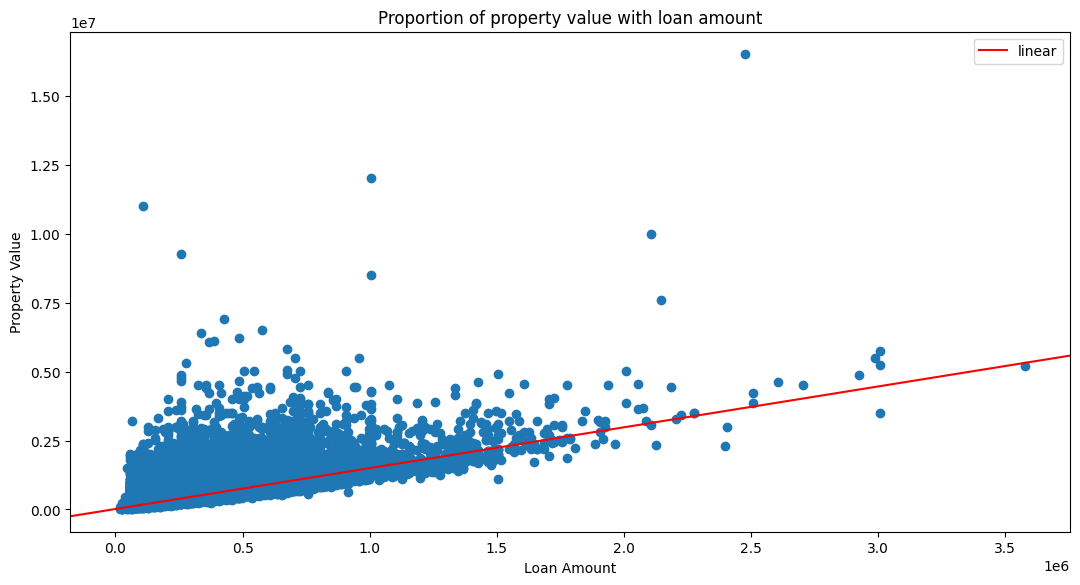

In [ ]:
reg = LinearRegression().fit(non_empty_data.drop(columns=['property_value']), non_empty_data['property_value'])
b = reg.intercept_
m = reg.coef_[0]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(dataset['loan_amount'], dataset['property_value'])
ax.axline(xy1=(0, b), slope=m, label='linear', color='r')
ax.set_xlabel('Loan Amount')  # Add x-axis label
ax.set_ylabel('Property Value')  # Add y-axis label
ax.title.set_text('Proportion of property value with loan amount')
ax.legend(loc='best')

In [ ]:
dataset['property_value'].isna().sum()/dataset['year'].count()

0.1080521082026685

In [ ]:
print(f"Percentage of 'defaulted' status in rows with missing values in `property_value` feature out of total 'defaulted' rows in the dataset: \033[1m{(dataset[dataset['property_value'].isna() & (dataset['status'] == 1)]['status'].count()*100)/dataset[dataset['status'] == 1]['status'].count(): .4f} %")

Percentage of 'defaulted' status in rows with missing values in `property_value` feature out of total 'defaulted' rows in the dataset:  42.5858 %


In [ ]:
missing_ids = dataset[dataset['property_value'].isna()].index
non_empty_data = dataset[~dataset.index.isin(missing_ids)][['property_value', 'loan_amount']]

lr_model = LinearRegression()
lr_model.fit(non_empty_data.drop(columns=['property_value']), non_empty_data['property_value'])

y_pred = lr_model.predict(dataset.loc[missing_ids]['loan_amount'].values.reshape(-1, 1))
test_dataset = dataset.copy()

# test_dataset['property_value'].fillna(y_pred)
test_dataset.loc[missing_ids, 'property_value'] = pd.Series(y_pred, index=missing_ids)
test_dataset.loc[missing_ids][['loan_amount', 'property_value']]

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


loan_amount  property_value
ID                                 
24891        206500   321365.620128
24916        476500   721494.220750
24932        466500   706674.642949
24942        136500   217628.575523
24943        166500   262087.308925
...             ...             ...
173534       276500   425102.664734
173539       256500   395463.509132
173542        96500   158350.264320
173548       386500   588118.020542
173553       106500   173169.842120

[15071 rows x 2 columns]

In [ ]:
dataset['property_value'] = test_dataset['property_value']

In [ ]:
data_for_cal = dataset[['property_value', 'ltv']].copy()
data_for_cal['diff'] = data_for_cal['property_value'] - data_for_cal['ltv']
data_for_cal['ratio'] = (data_for_cal['ltv']/data_for_cal['property_value'])*100
data_for_cal.describe()

property_value            ltv          diff          ratio
count    1.394790e+05  124408.000000  1.244080e+05  124408.000000
mean     5.029326e+05      71.539245  5.026867e+05       0.022429
std      3.608697e+05      18.923275  3.676389e+05       0.020399
min      1.800000e+04       0.967478  1.790833e+04       0.000009
25%      2.780000e+05      59.831461  2.679528e+05       0.010511
50%      4.280000e+05      74.280576  4.179410e+05       0.017249
75%      6.325768e+05      84.851301  6.279385e+05       0.028018
max      1.650800e+07     263.541667  1.650798e+07       0.848214

In [ ]:
dataset.isna().sum()

year                             0
loan_limit                       0
gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
upfront_charges                  0
term                             0
neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value                   0
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                           0
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                              0
submission_of_application        0
ltv                          15071
region                           0
security_type       

#### Submission of application feature(`submission_of_application`)
- The feature initially had null values in 200 records, but if we inspect carefully, the values have been removed while in the cleaning of the [`age` feature](#age-feature-cleaning-block), so we don't have anything to do for this feature currently.

#### Loan to value feature(`ltv`)
- [To be done]

In [ ]:
test_dataset = dataset[['loan_amount', 'property_value', 'ltv']]

In [ ]:
test_dataset['calculated_ltv'] = (test_dataset['loan_amount']/test_dataset['property_value'])*100

/tmp/ipykernel_95/1045538442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['calculated_ltv'] = (test_dataset['loan_amount']/test_dataset['property_value'])*100


In [ ]:
test_dataset

loan_amount  property_value        ltv  calculated_ltv
ID                                                            
24890        116500   118000.000000  98.728814       98.728814
24891        206500   321365.620128        NaN       64.257029
24892        406500   508000.000000  80.019685       80.019685
24893        456500   658000.000000  69.376900       69.376900
24894        696500   758000.000000  91.886544       91.886544
...             ...             ...        ...             ...
173555       436500   608000.000000  71.792763       71.792763
173556       586500   788000.000000  74.428934       74.428934
173557       446500   728000.000000  61.332418       61.332418
173558       196500   278000.000000  70.683453       70.683453
173559       406500   558000.000000  72.849462       72.849462

[139479 rows x 4 columns]

In [ ]:
dataset['ltv'] = test_dataset['calculated_ltv']

In [ ]:
dataset.isna().sum()

year                             0
loan_limit                       0
gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
upfront_charges                  0
term                             0
neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value                   0
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                           0
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                              0
submission_of_application        0
ltv                              0
region                           0
security_type       

#### Debt to income ratio feature(`dtir1`)
- [To be done]

In [ ]:
dataset[dataset['status'] == 1]['year'].count()

35385

In [ ]:
dataset[dataset['dtir1'].isna() & (dataset['status'] == 1)]['year'].count()

15069

In [ ]:
dataset.drop(columns=['dtir1'], inplace=True)

In [ ]:
dataset.isna().sum()

year                         0
loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
upfront_charges              0
term                         0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
income                       0
credit_type                  0
credit_score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
ltv                          0
region                       0
security_type                0
status                       0
dtype: int64

### Cleanse summary

In [ ]:
dataset.isna().sum()

year                         0
loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
upfront_charges              0
term                         0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
income                       0
credit_type                  0
credit_score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
ltv                          0
region                       0
security_type                0
status                       0
dtype: int64

In [ ]:
dataset.shape

(139479, 30)

## Detecting outliers and removal (IQR metohd)

year                  Axes(0.125,0.747241;0.352273x0.132759)
loan_amount        Axes(0.547727,0.747241;0.352273x0.132759)
upfront_charges       Axes(0.125,0.587931;0.352273x0.132759)
term               Axes(0.547727,0.587931;0.352273x0.132759)
property_value        Axes(0.125,0.428621;0.352273x0.132759)
income             Axes(0.547727,0.428621;0.352273x0.132759)
credit_score           Axes(0.125,0.26931;0.352273x0.132759)
ltv                 Axes(0.547727,0.26931;0.352273x0.132759)
status                    Axes(0.125,0.11;0.352273x0.132759)
dtype: object

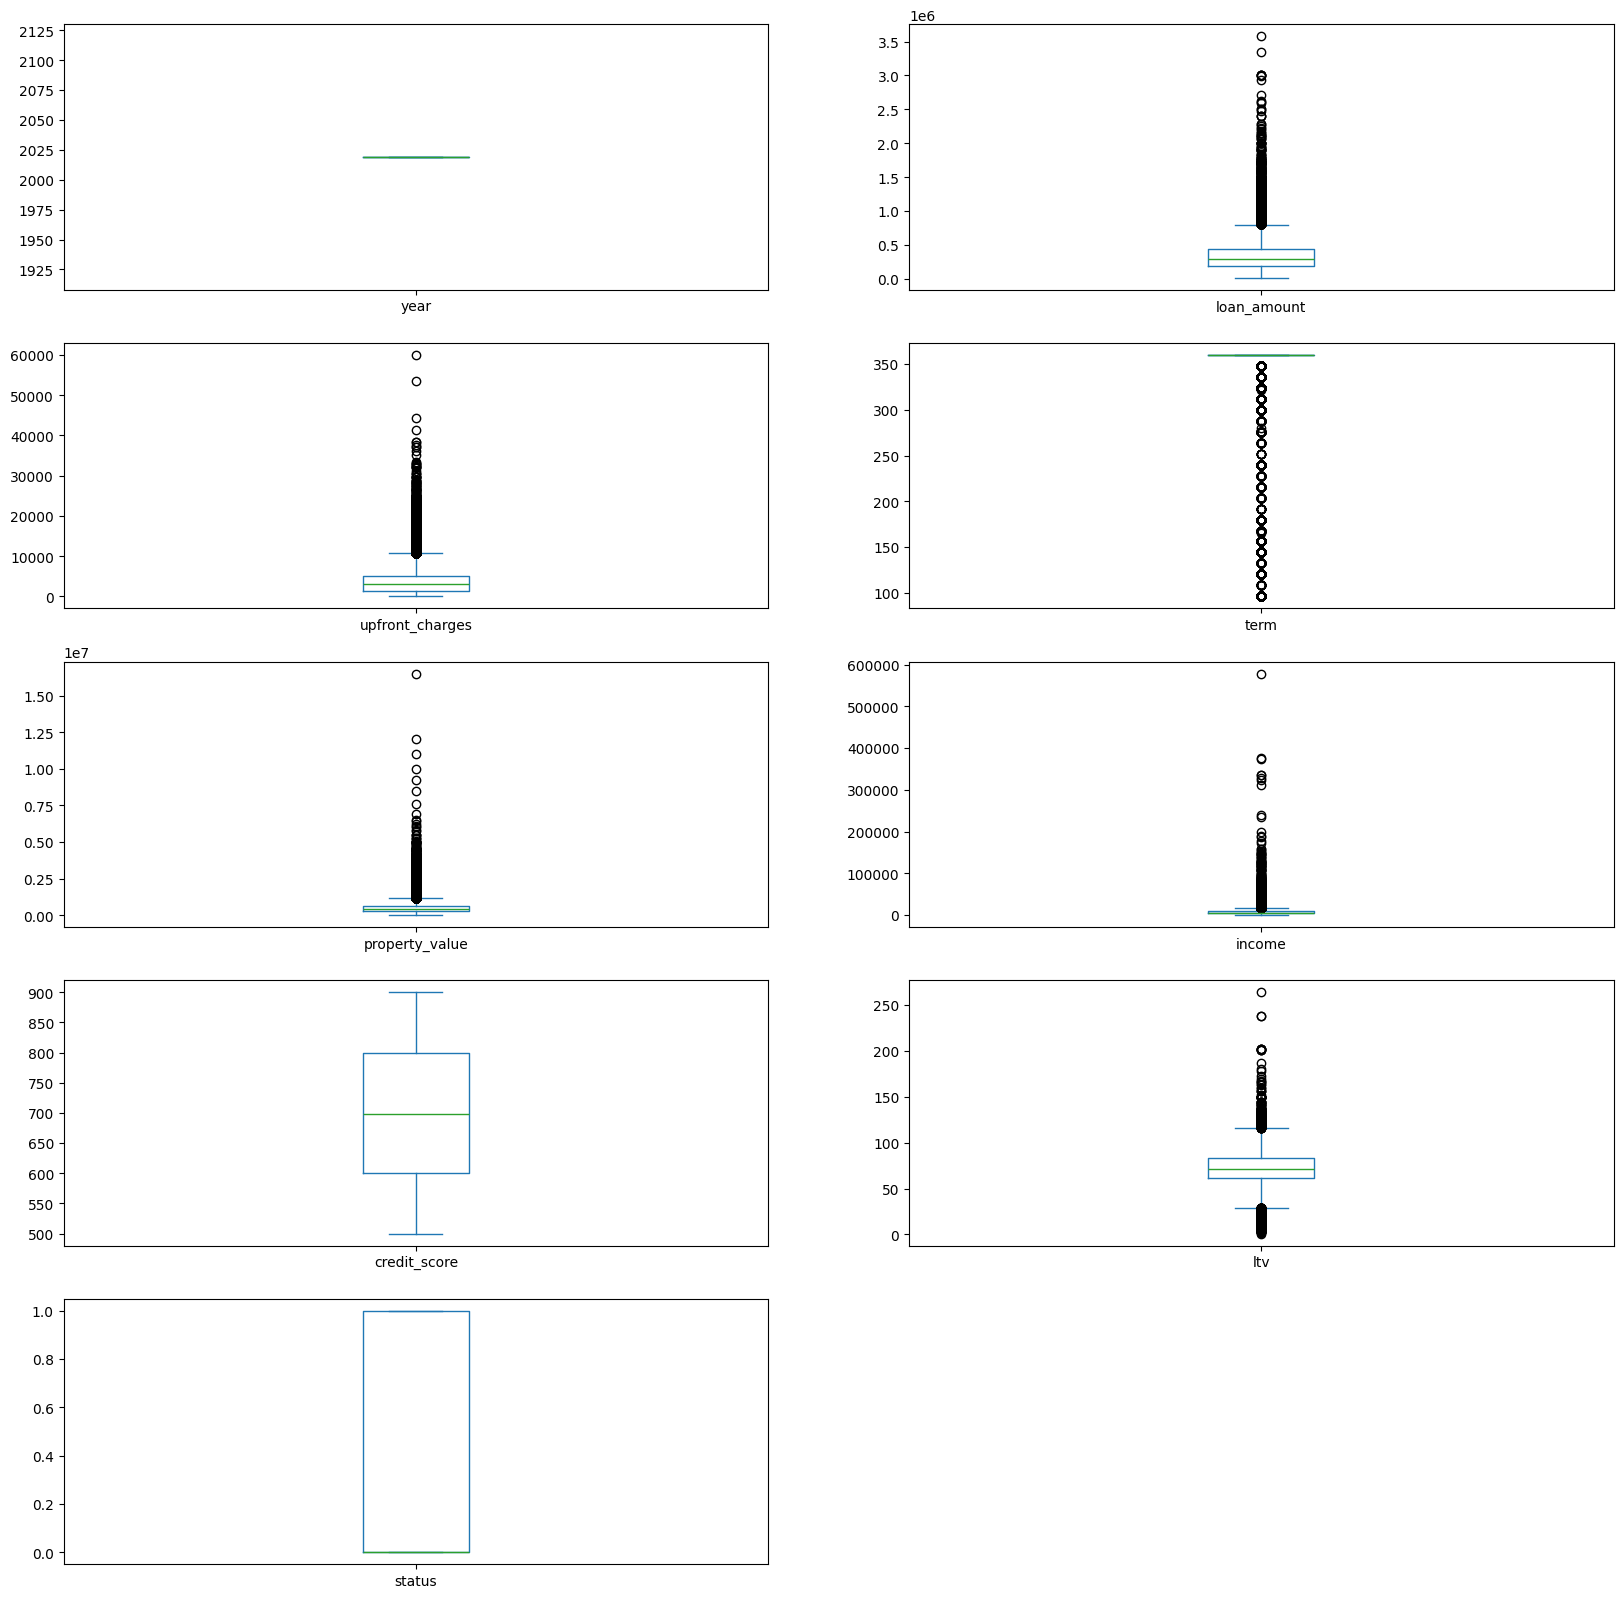

In [ ]:
# outlier detection
dataset.plot(kind="box",subplots=True,layout=(5,2),figsize=(20,20))

In [ ]:
dataset1 = dataset.copy()

In [ ]:
#removing outliers 

for col in dataset1:
    if pd.api.types.is_numeric_dtype(dataset1[col]):
        iqr = 1.5 * (np.percentile(dataset1[col], 75) - np.percentile(dataset1[col], 25))
        upper_bound = iqr + np.percentile(dataset1[col], 75)
        lower_bound = np.percentile(dataset1[col], 25) - iqr
        dataset1.drop(dataset1[(dataset1[col] > upper_bound) | (dataset1[col] < lower_bound)].index, inplace=True)
    else :
        continue

In [ ]:
dataset1.shape

(98946, 30)

year                  Axes(0.125,0.747241;0.352273x0.132759)
loan_amount        Axes(0.547727,0.747241;0.352273x0.132759)
upfront_charges       Axes(0.125,0.587931;0.352273x0.132759)
term               Axes(0.547727,0.587931;0.352273x0.132759)
property_value        Axes(0.125,0.428621;0.352273x0.132759)
income             Axes(0.547727,0.428621;0.352273x0.132759)
credit_score           Axes(0.125,0.26931;0.352273x0.132759)
ltv                 Axes(0.547727,0.26931;0.352273x0.132759)
status                    Axes(0.125,0.11;0.352273x0.132759)
dtype: object

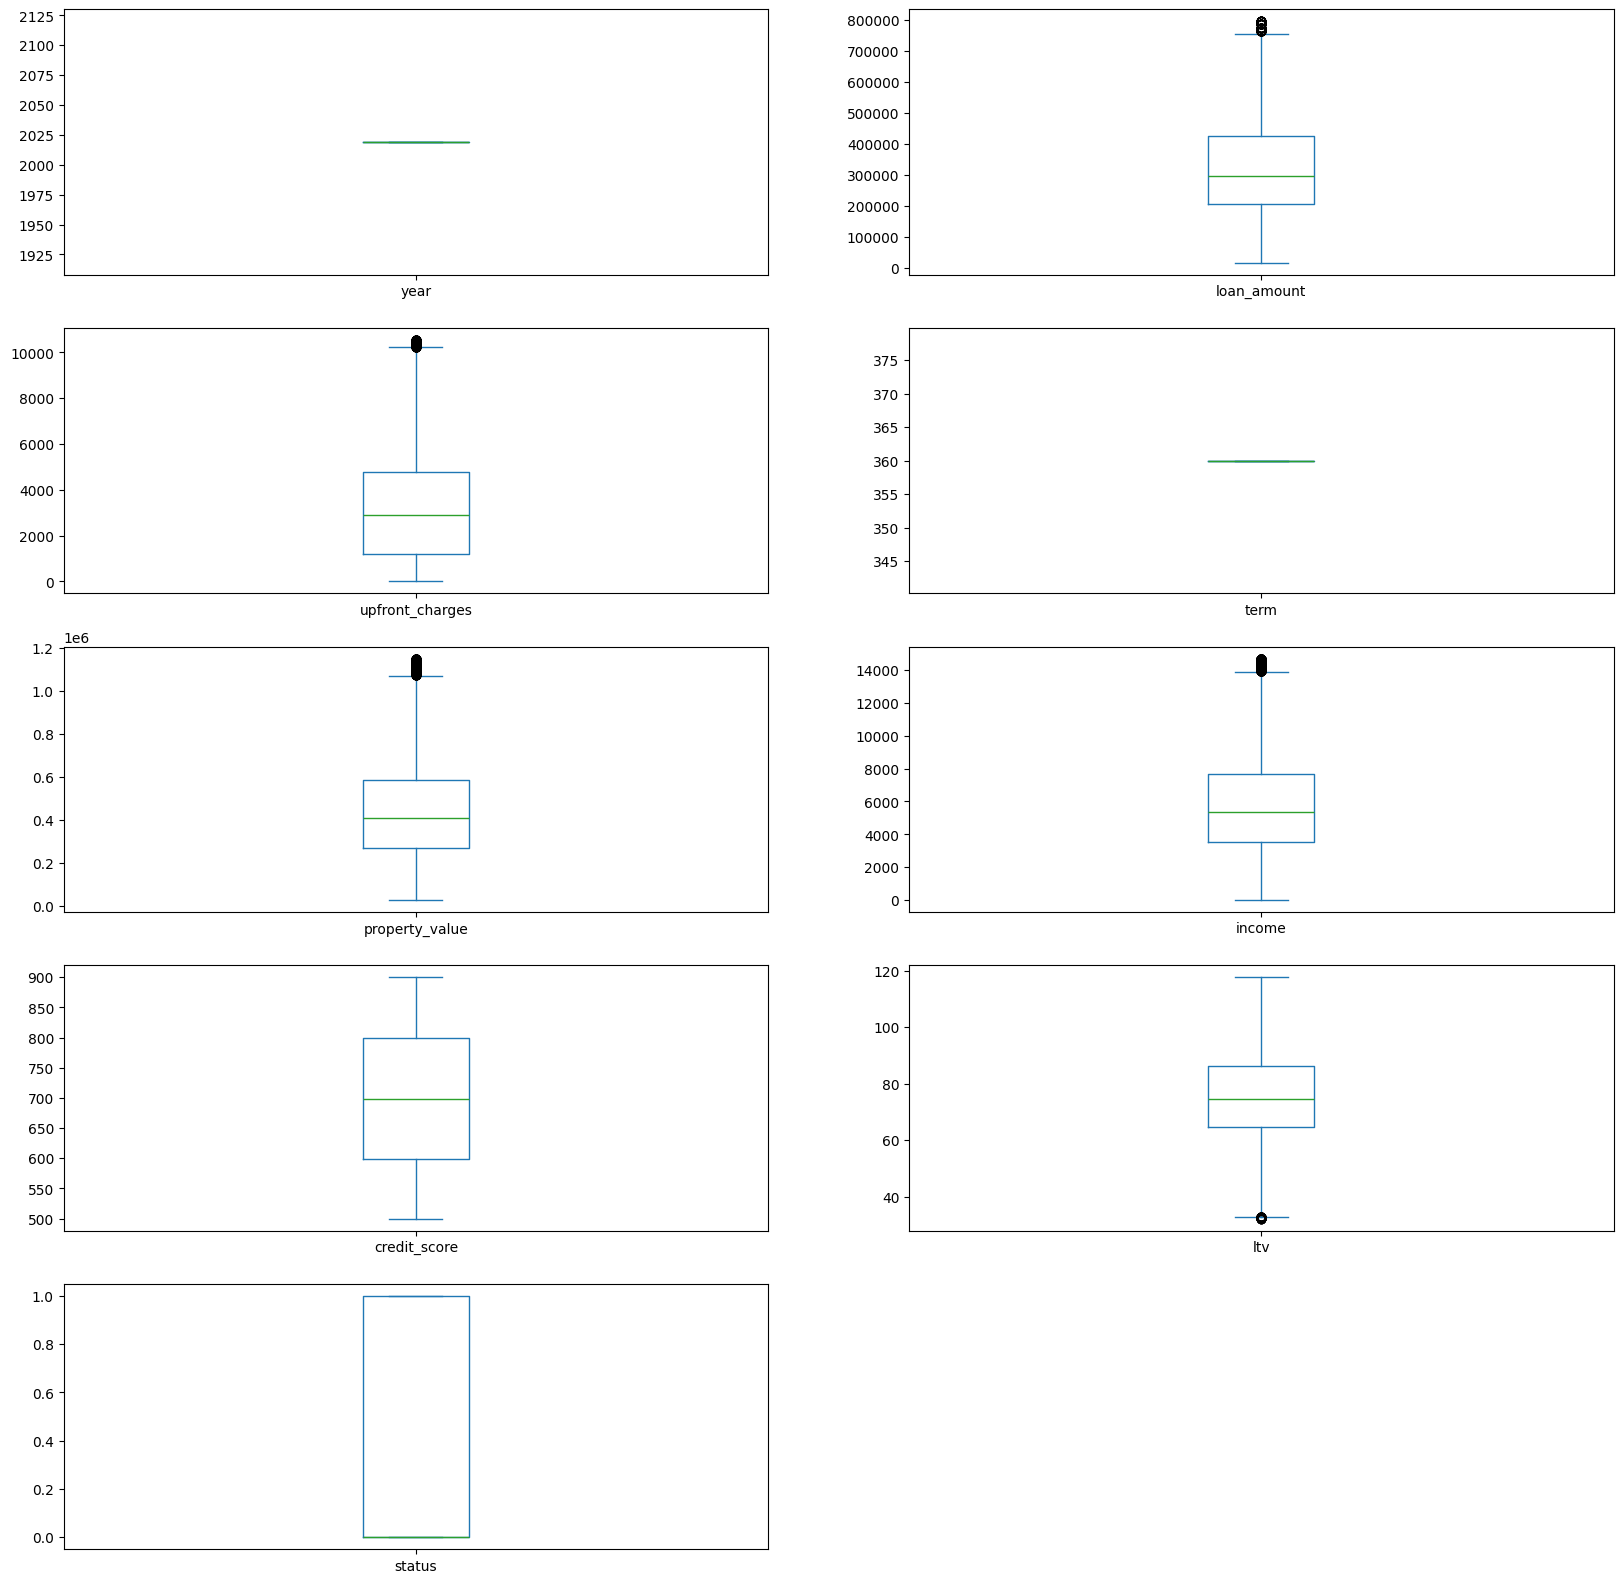

In [ ]:
# after removing outliers
dataset1.plot(kind="box",subplots=True,layout=(5,2),figsize=(20,20))

### Descriptive Analysis after cleanning

In [ ]:
# descriptive statistics
dataset1.describe()

year    loan_amount  upfront_charges     term  property_value  \
count  98946.0   98946.000000     98946.000000  98946.0    9.894600e+04   
mean    2019.0  320523.507772      3183.318813    360.0    4.449380e+05   
std        0.0  153580.669670      2462.204441      0.0    2.241523e+05   
min     2019.0   16500.000000         0.000000    360.0    2.800000e+04   
25%     2019.0  206500.000000      1172.455000    360.0    2.680000e+05   
50%     2019.0  296500.000000      2909.420000    360.0    4.080000e+05   
75%     2019.0  426500.000000      4793.907500    360.0    5.880000e+05   
max     2019.0  796500.000000     10537.500000    360.0    1.151262e+06   

             income  credit_score           ltv        status  
count  98946.000000  98946.000000  98946.000000  98946.000000  
mean    5830.846522    699.603824     74.480174      0.260536  
std     3010.537404    115.889512     15.268346      0.438929  
min        0.000000    500.000000     32.175090      0.000000  
25%     3540.000000    599.000000     64.756944      0.000000  
50%     5340.000000    699.000000     74.686520      0.000000  
75%     7680.000000    800.000000     86.073826      1.000000  
max    14700.000000    900.000000    117.708333      1.000000

# Data Visualizations

In [ ]:
# separate categorical and numerical columns
categorical_cols = []
numerical_cols = []
for col in dataset1.columns:
    if(dataset1[col].dtype == 'object'):
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [ ]:
print('Categorical columns: \n', categorical_cols)
print('\n')
print('Numerical columns: \n', numerical_cols)

Categorical columns: 
 ['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'region', 'security_type']


Numerical columns: 
 ['year', 'loan_amount', 'upfront_charges', 'term', 'property_value', 'income', 'credit_score', 'ltv', 'status']


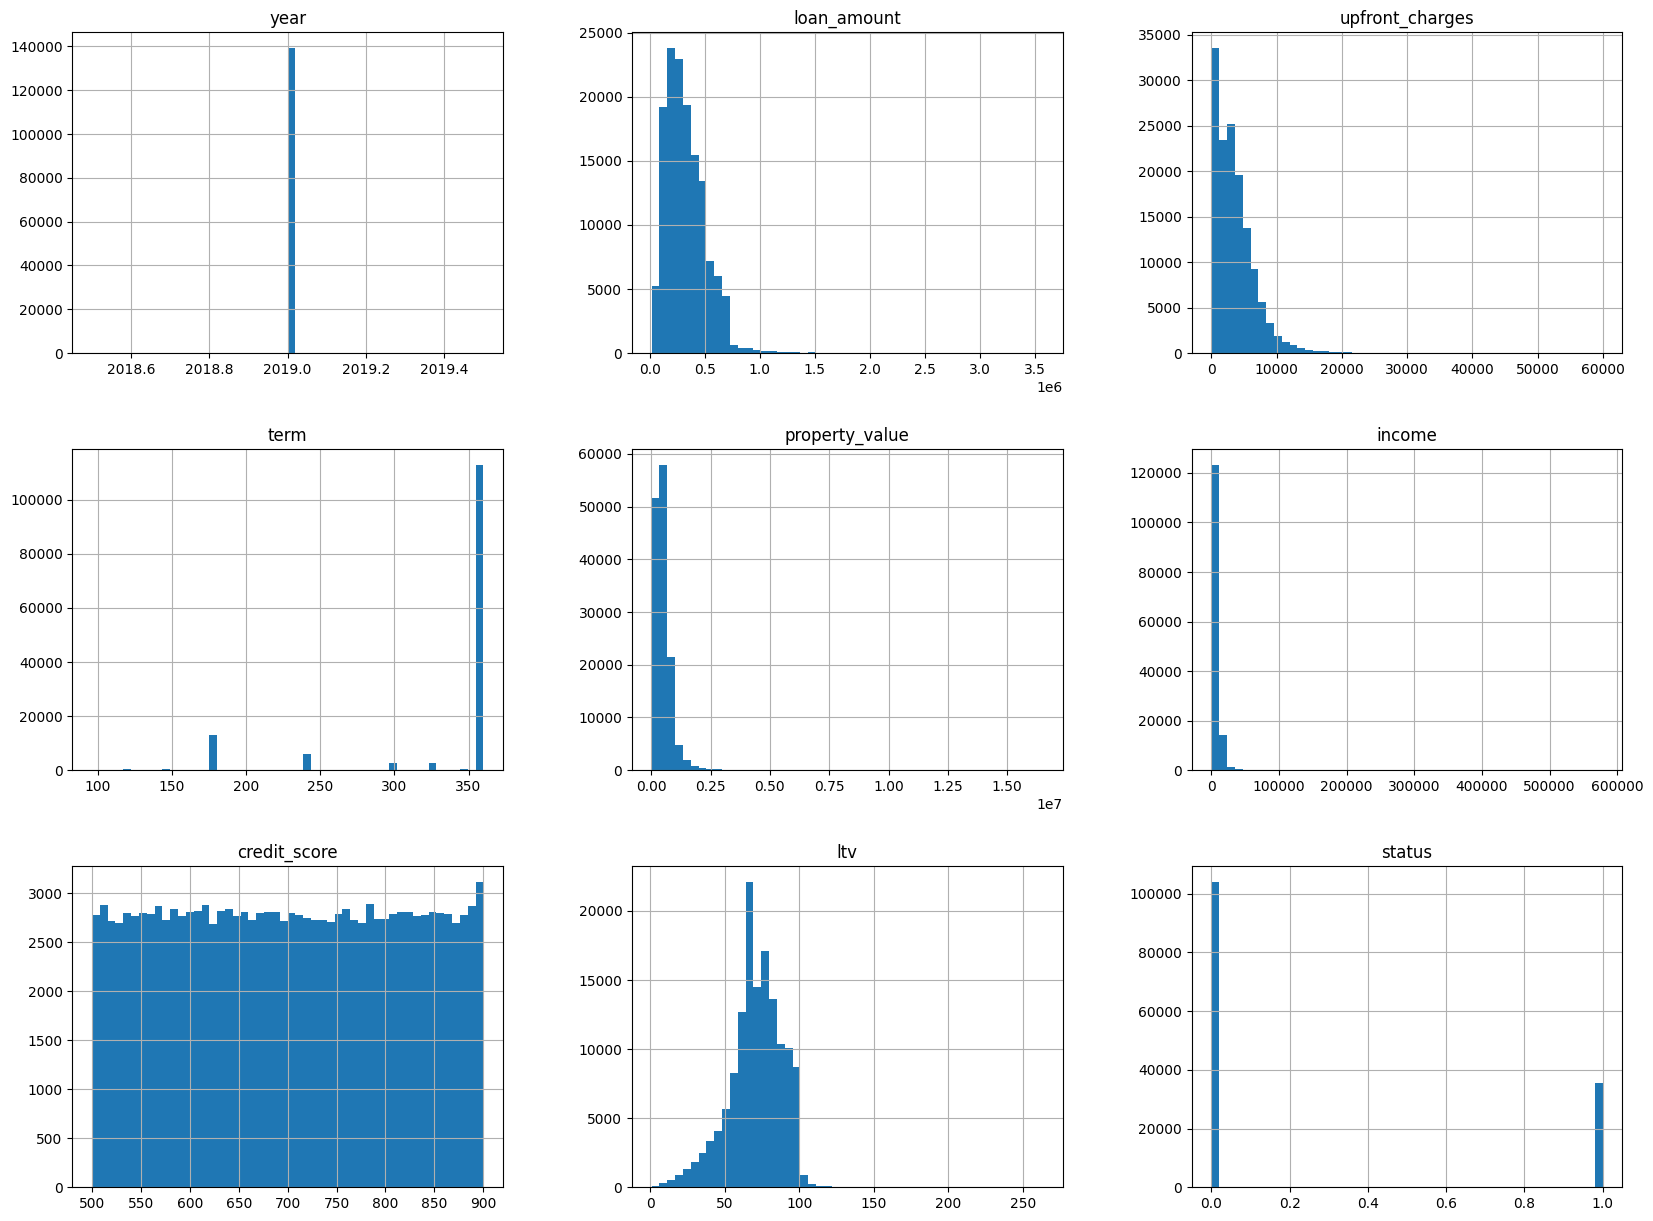

In [ ]:
# Numerical data histogram
dataset.hist(bins = 50, figsize = (20, 15))
plt.show()

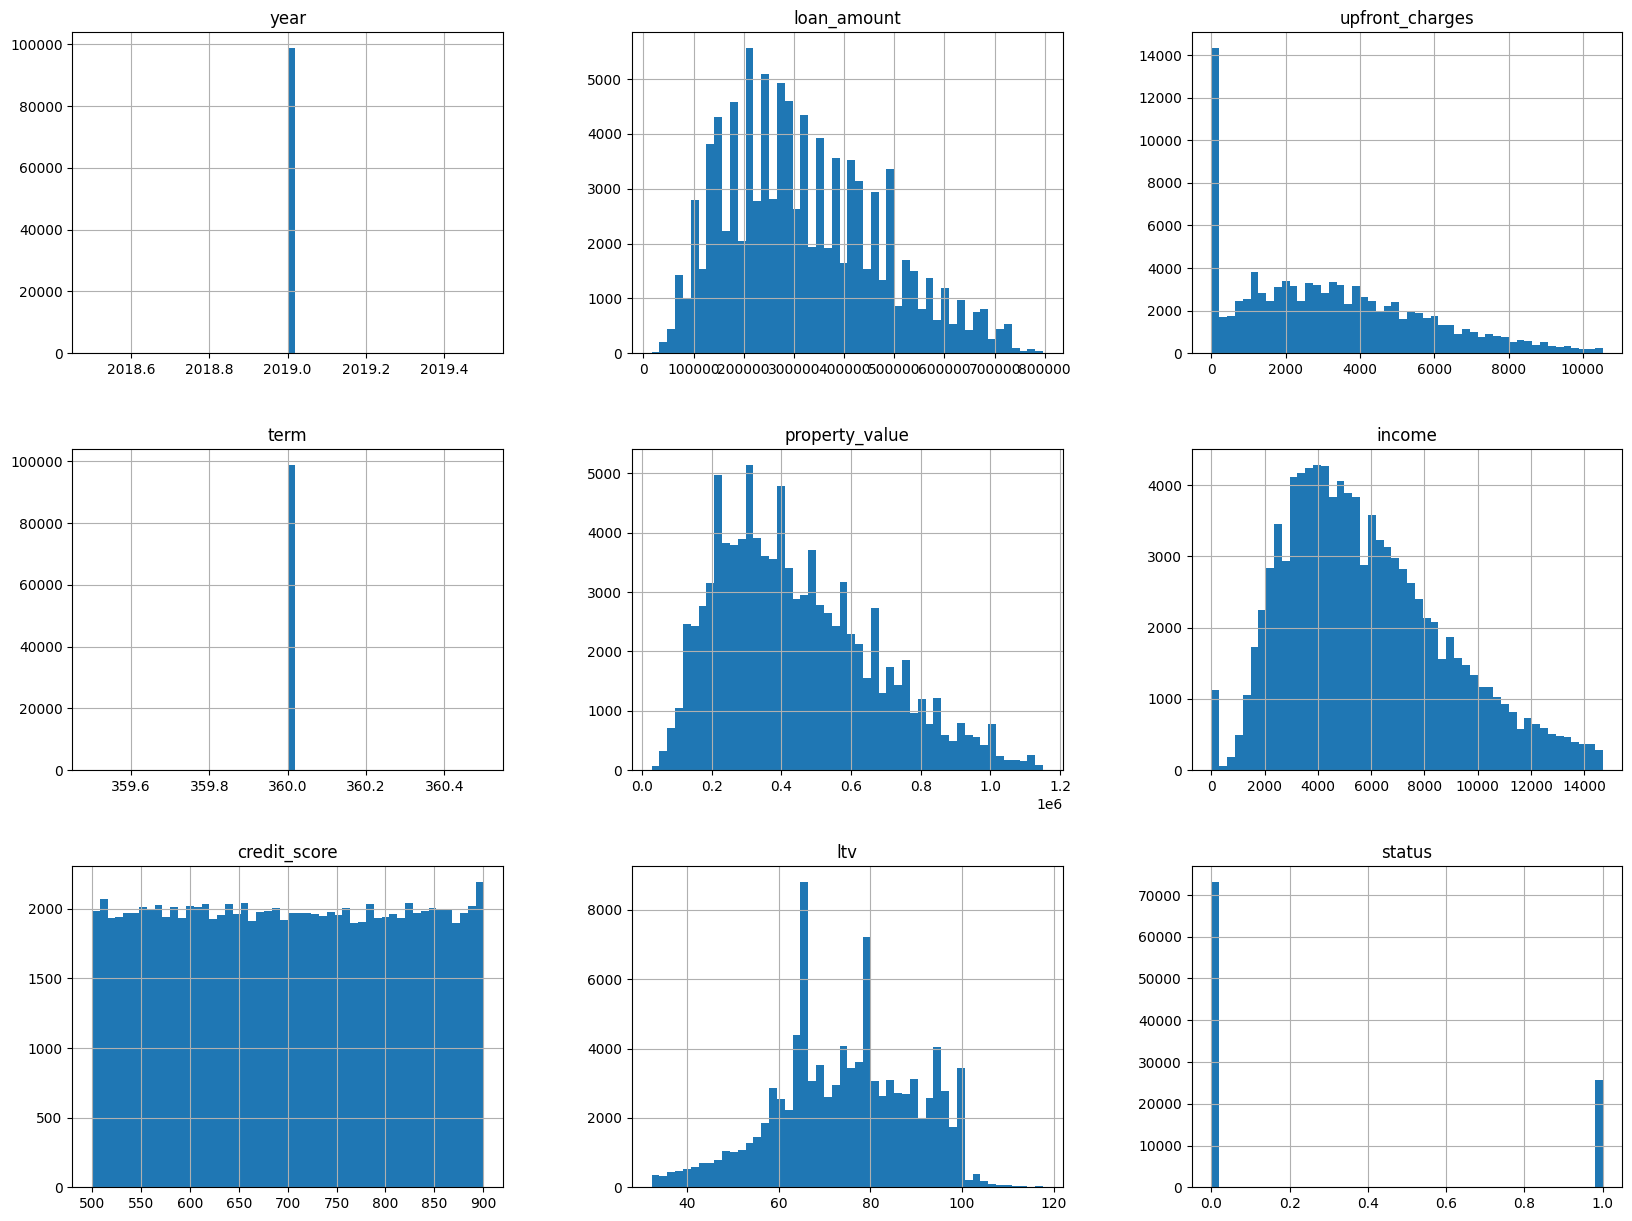

In [ ]:
# Numerical data histogram
dataset1.hist(bins = 50, figsize = (20, 15))
plt.show()

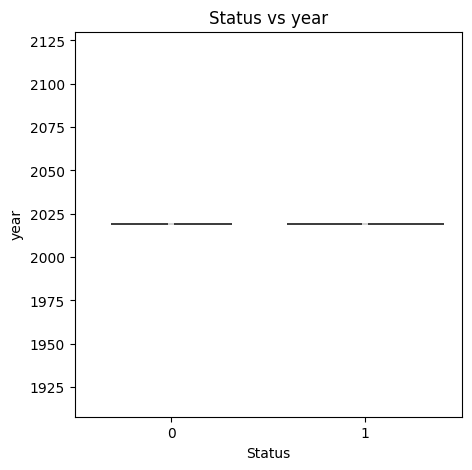

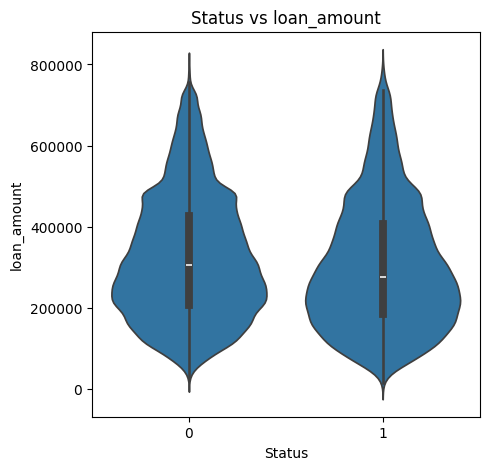

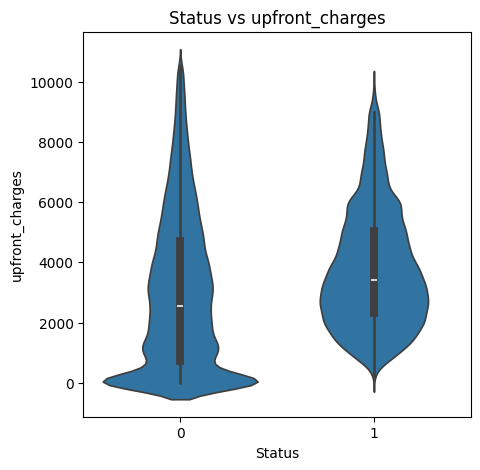

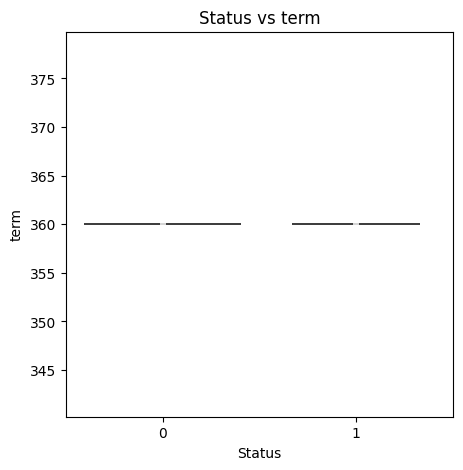

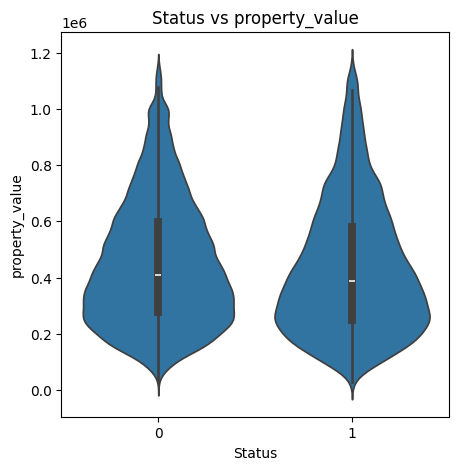

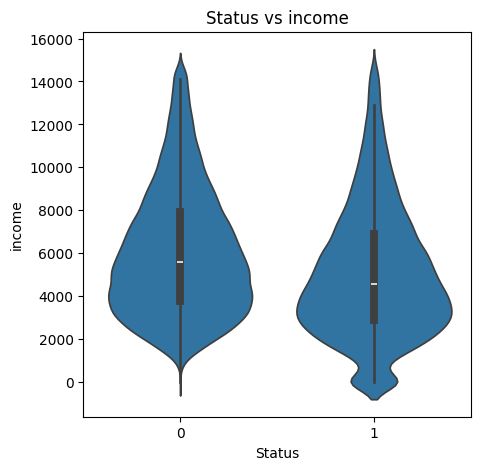

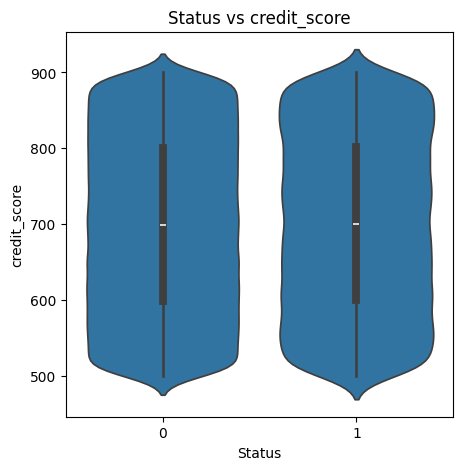

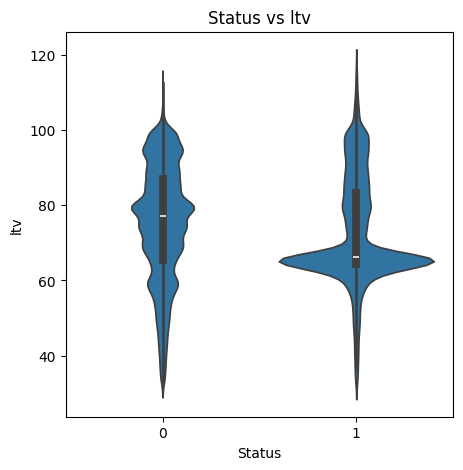

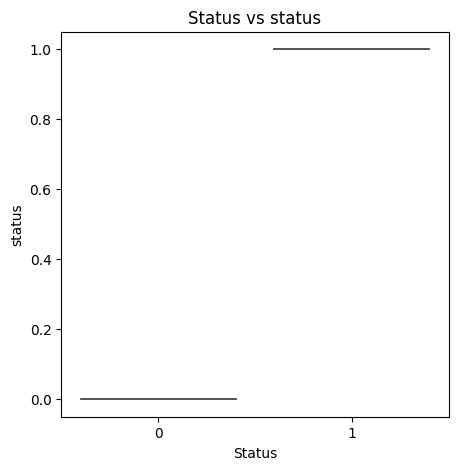

In [ ]:
# violin plots for numerical columns vs Status
for col in numerical_cols:
    plt.figure(figsize=(5, 5))
    sns.violinplot(x='status', y=col, data=dataset1)
    plt.title(f'Status vs {col}')
    plt.xlabel('Status')
    plt.ylabel(col)
    plt.show()

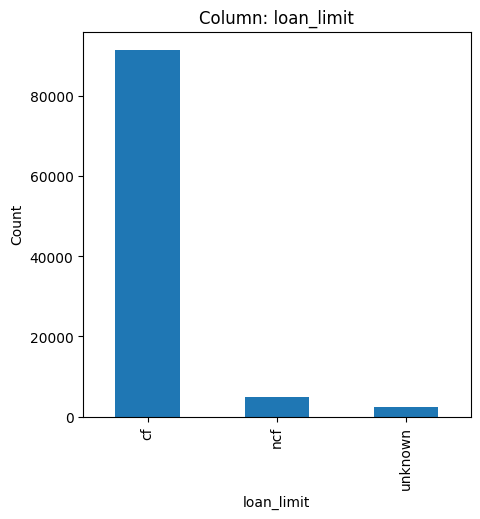

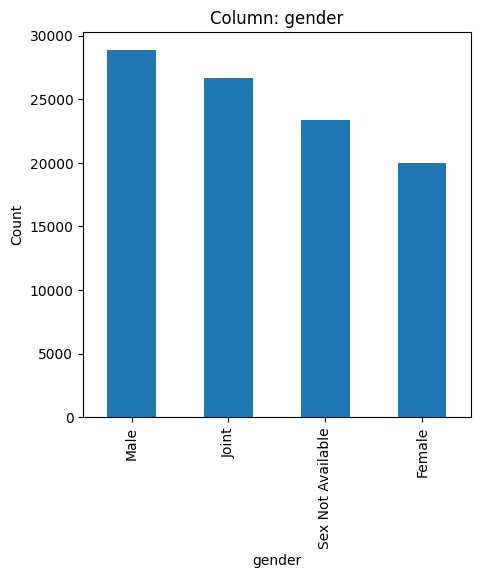

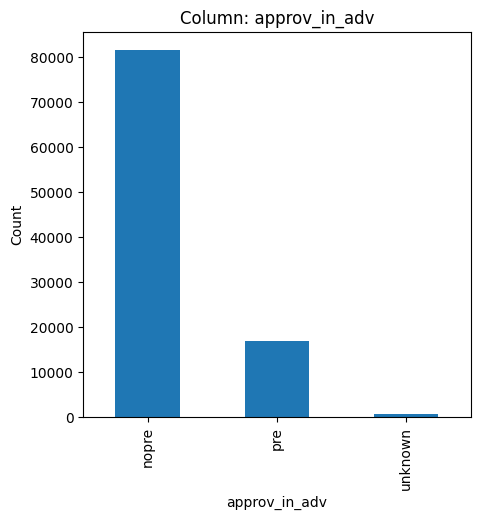

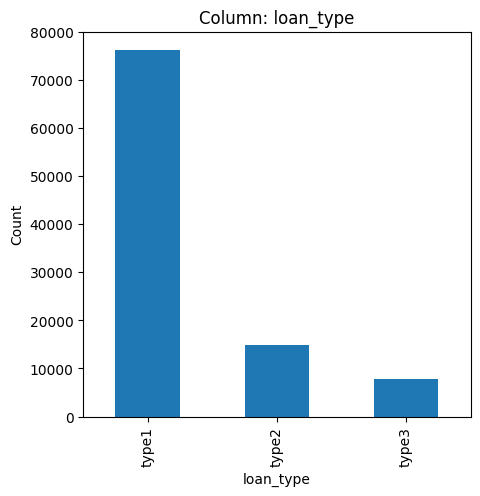

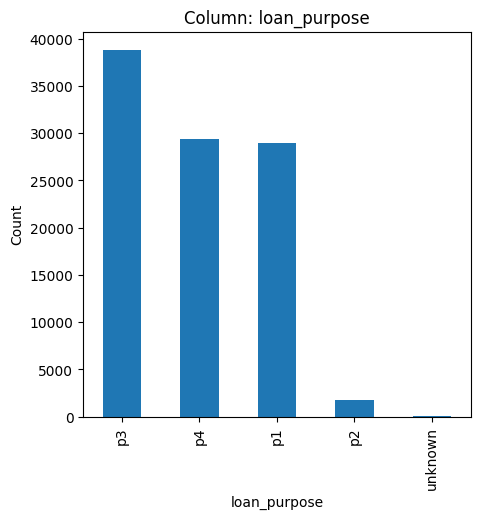

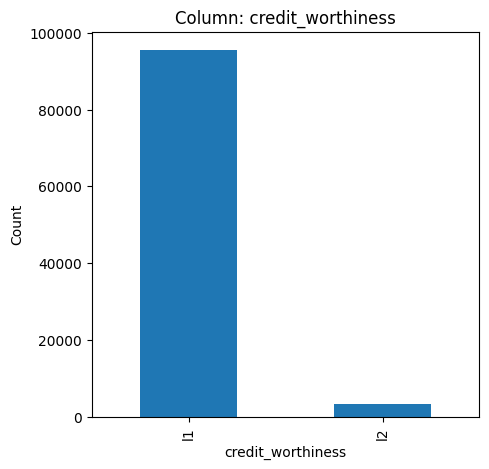

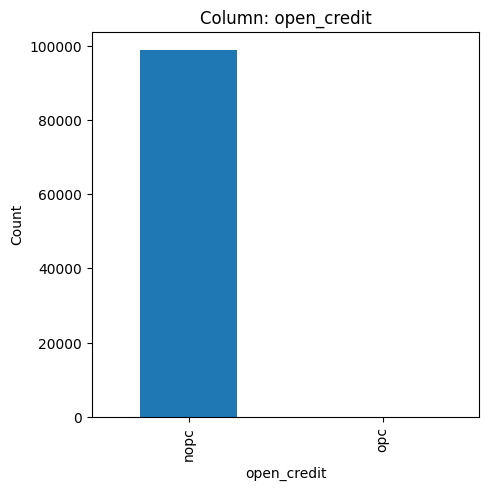

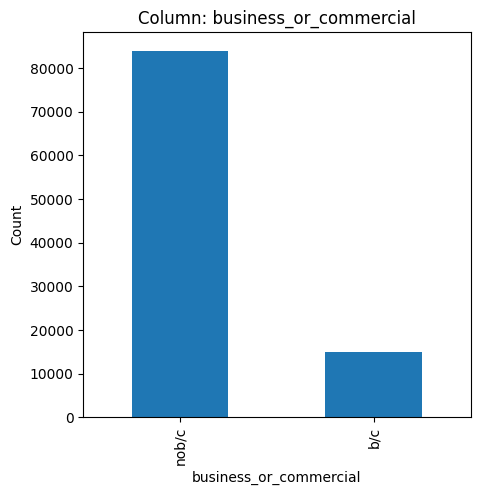

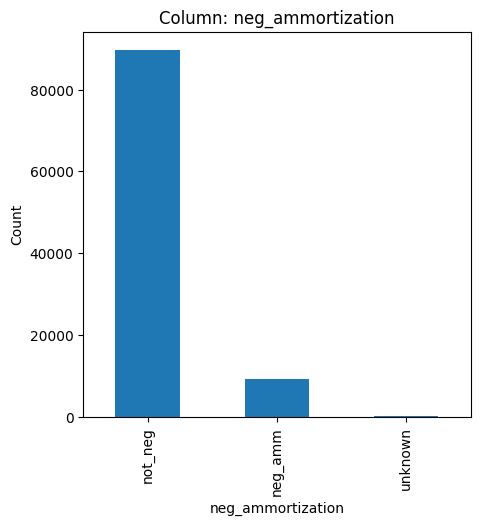

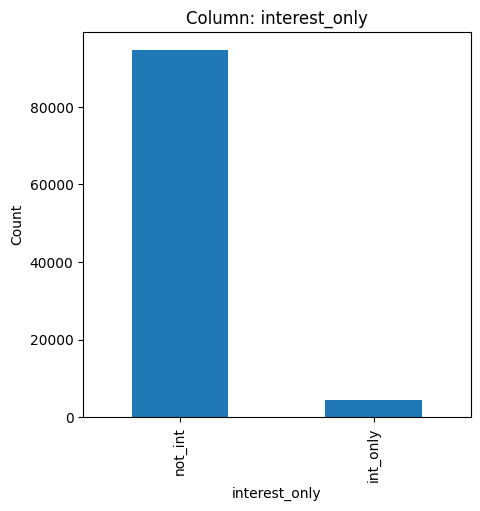

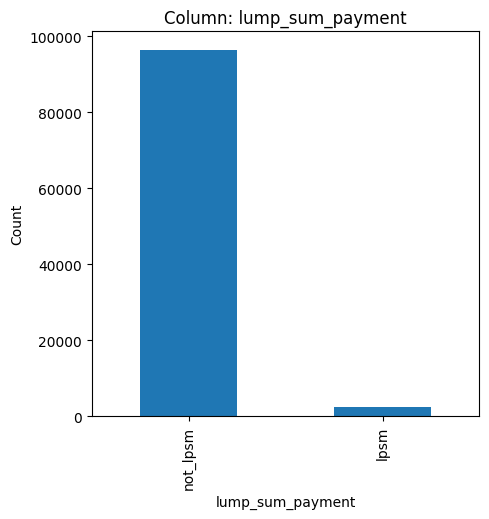

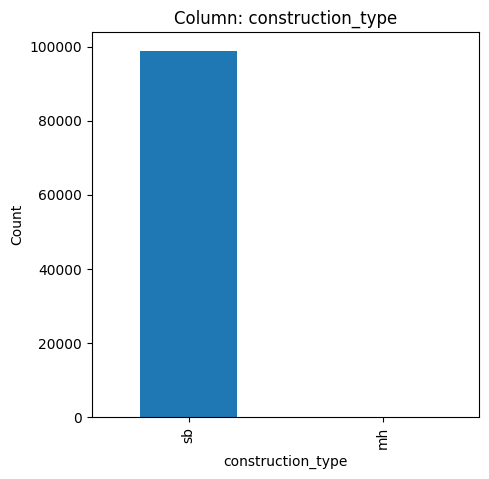

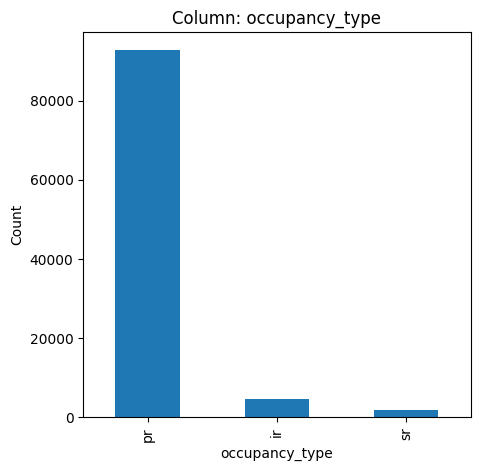

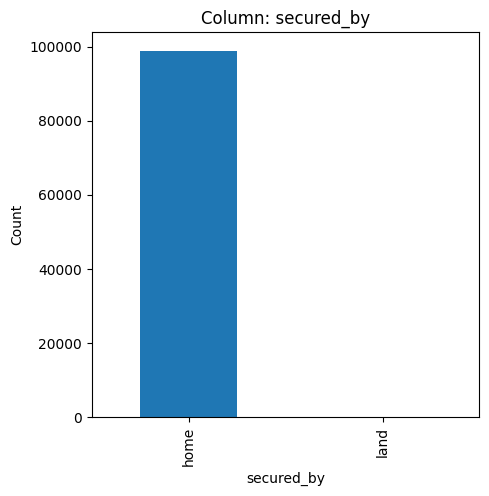

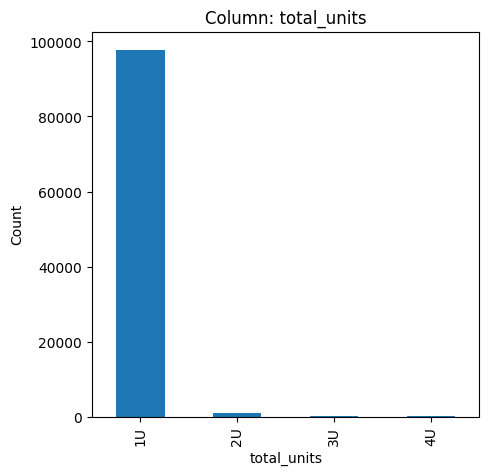

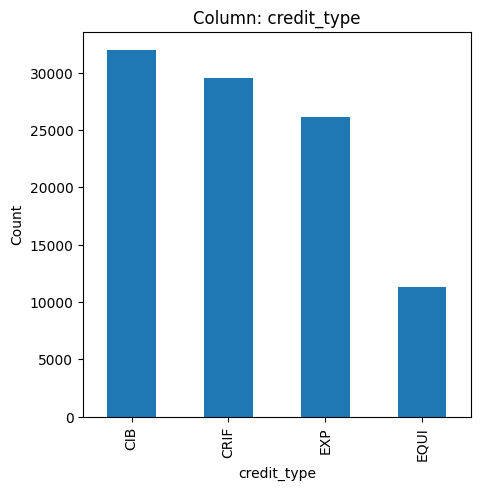

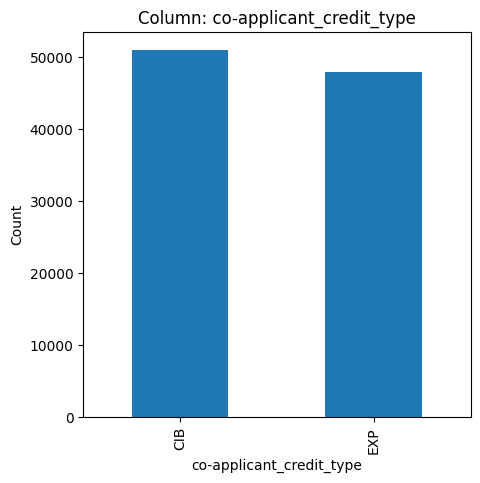

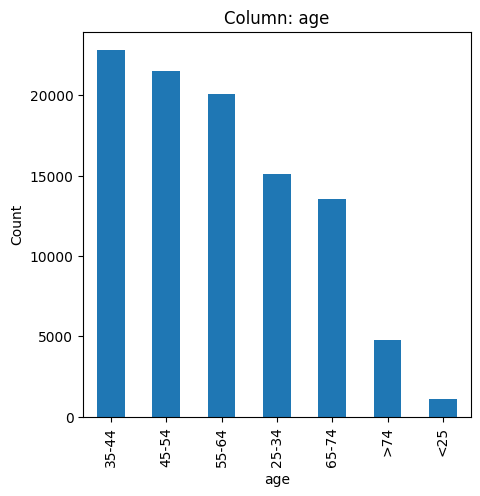

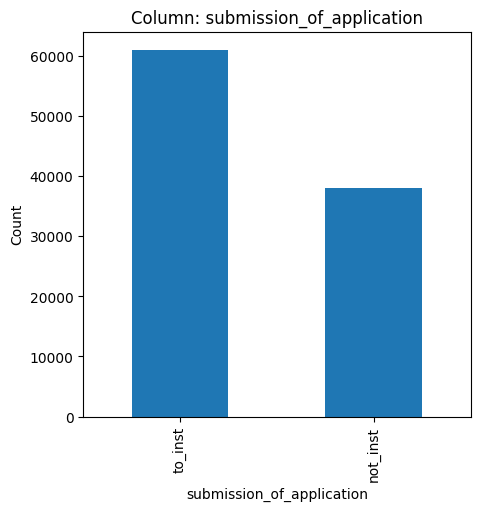

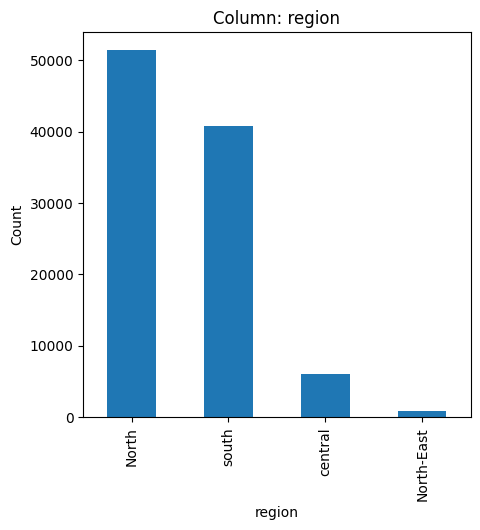

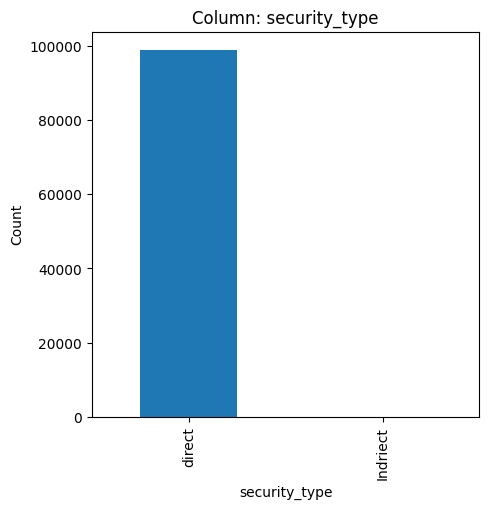

In [ ]:
# plotting categorical columns
for col in categorical_cols:
    fig = plt.figure(figsize = (5, 5))
    dataset1[col].value_counts().plot(kind='bar') 
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Column: ' + col)
    plt.show()

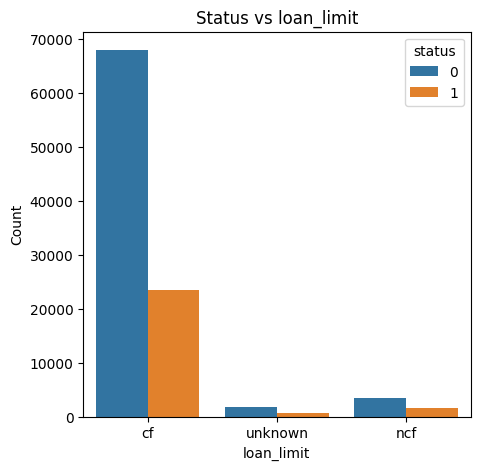

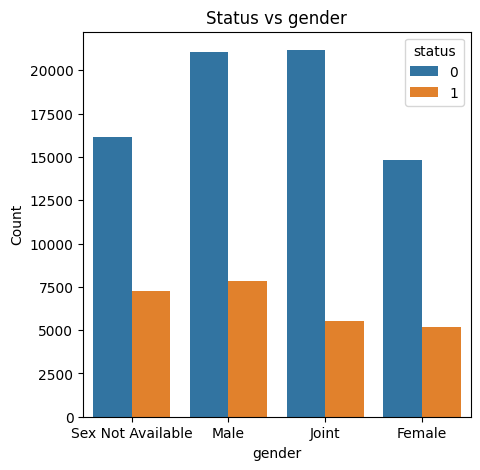

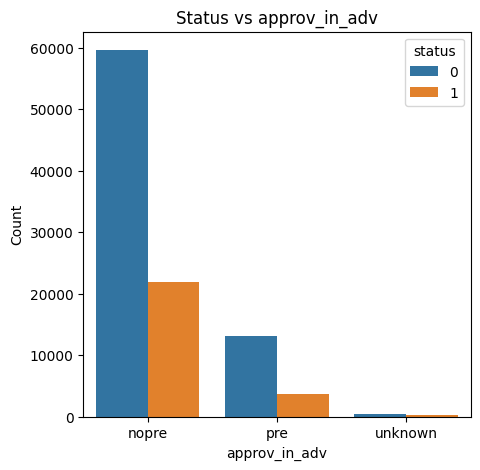

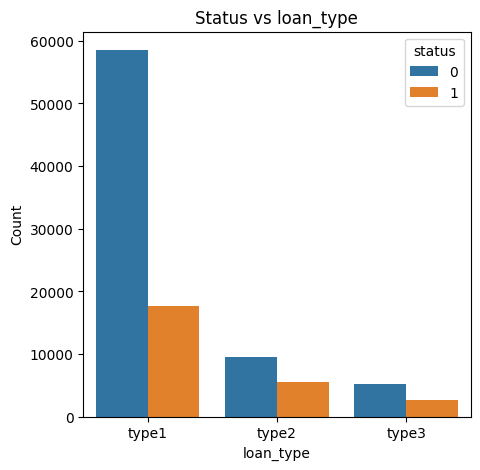

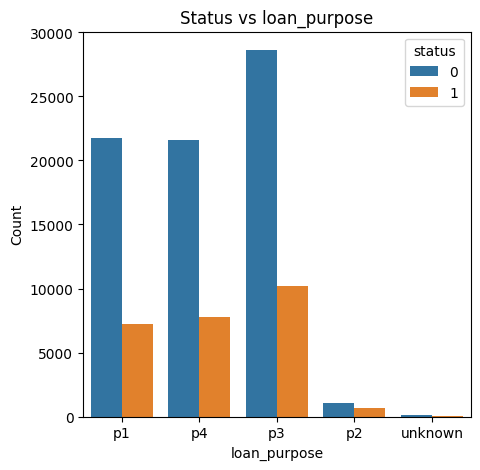

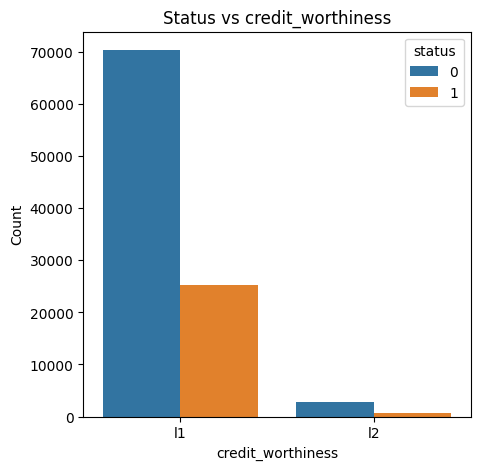

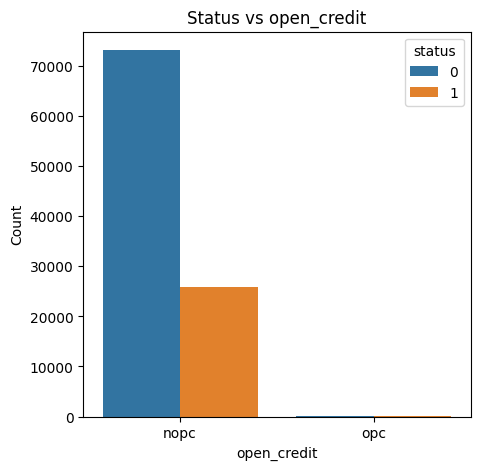

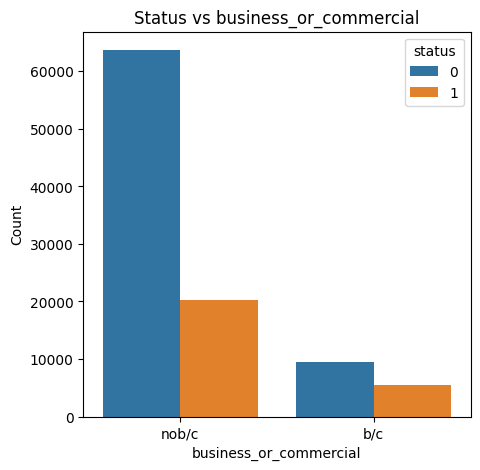

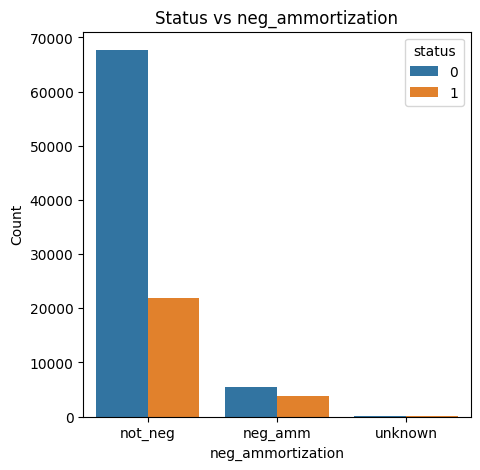

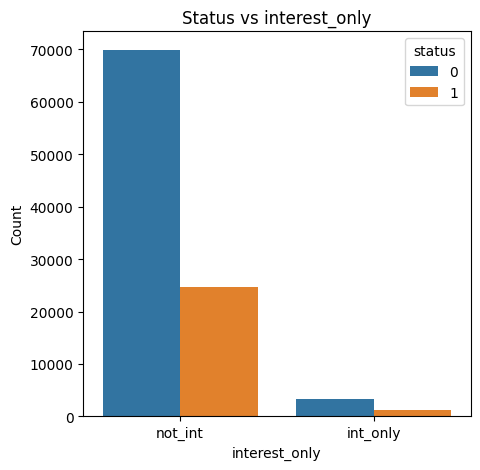

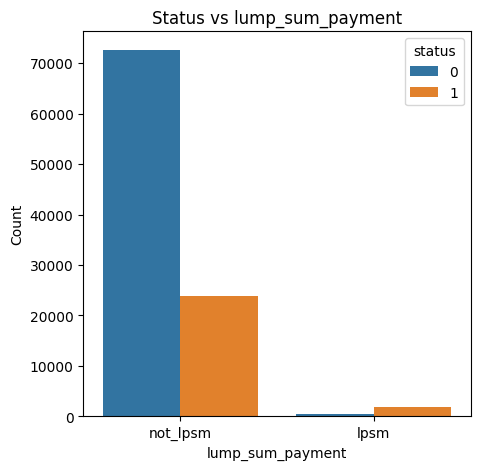

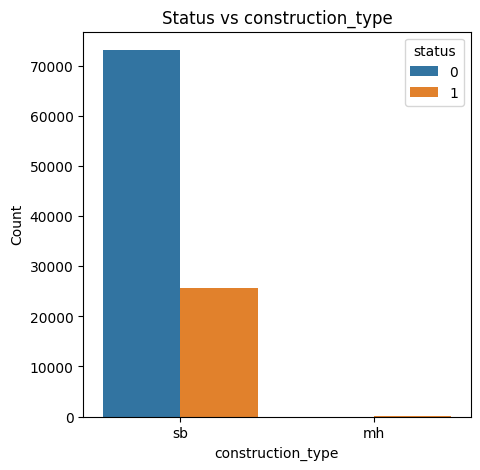

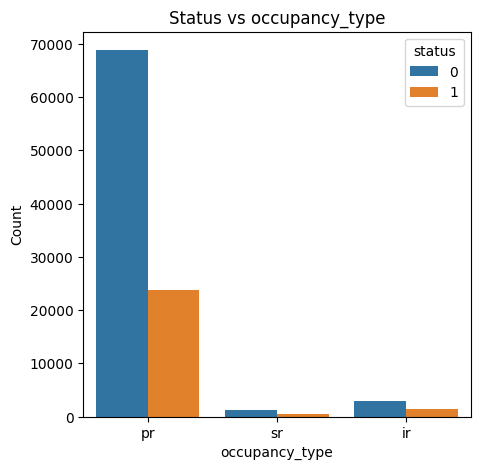

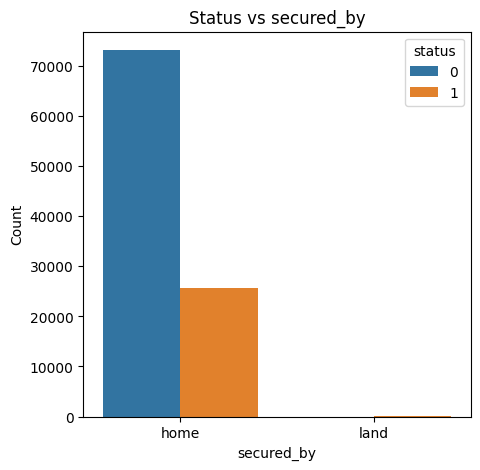

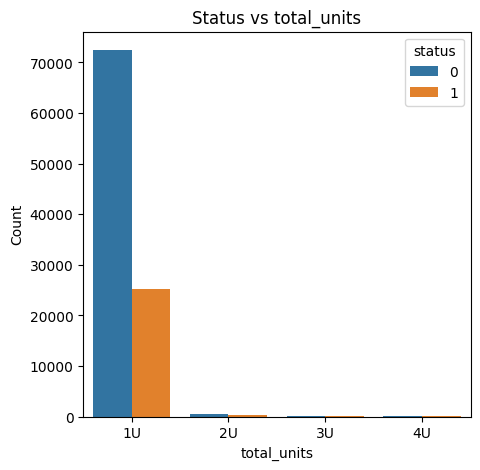

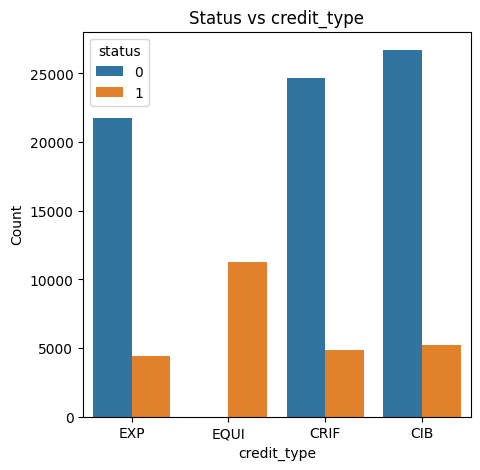

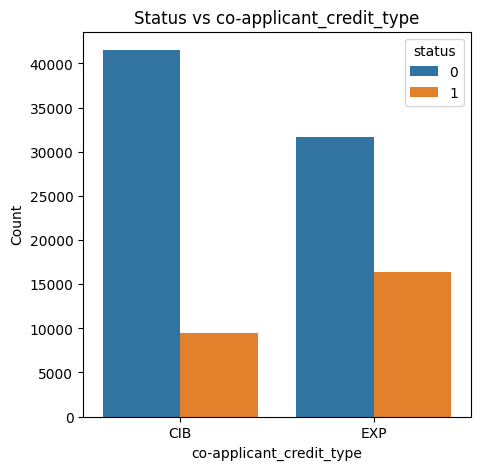

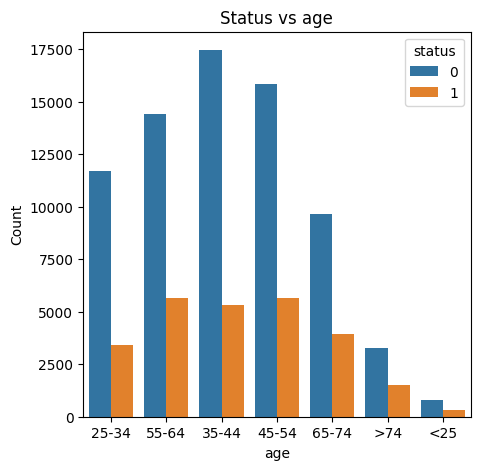

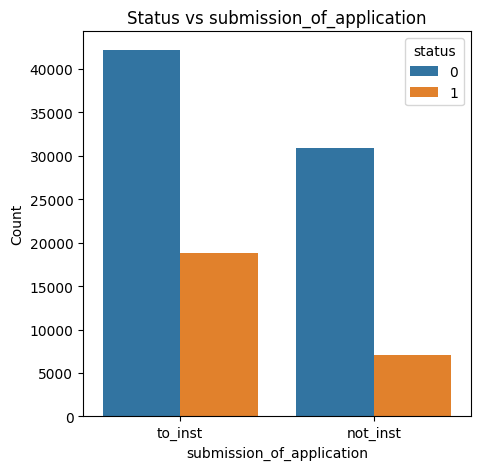

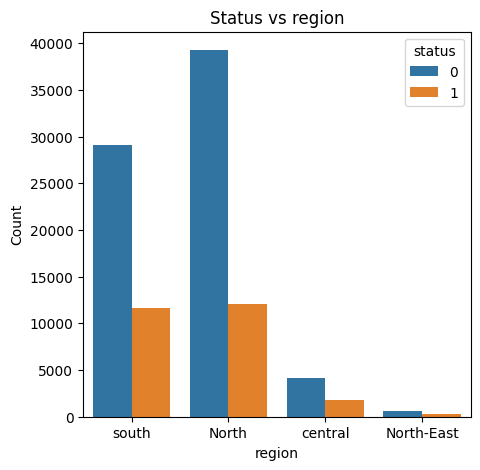

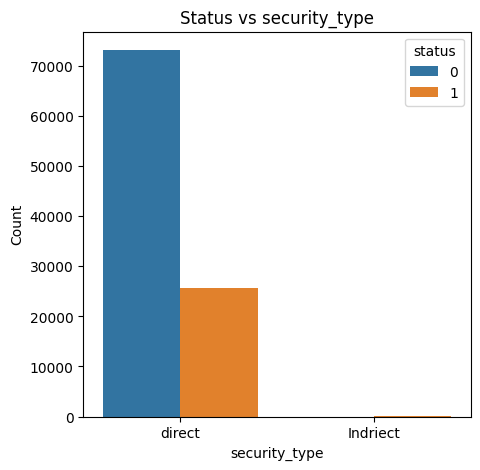

In [ ]:
# count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(5, 5))
    sns.countplot(dataset1, x=col, hue="status")
    plt.title(f'Status vs {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

/tmp/ipykernel_95/1810885373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1['loan_amount'])


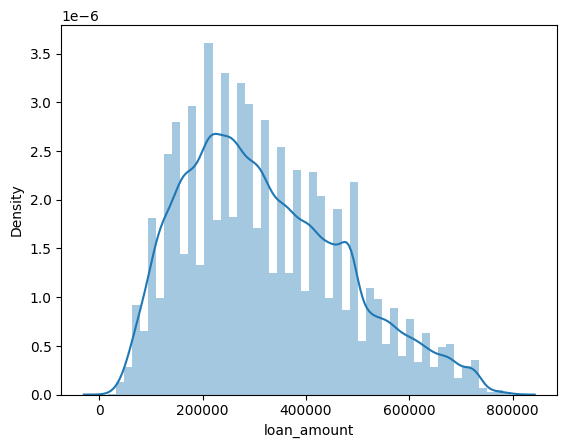

In [ ]:
sns.distplot(dataset1['loan_amount'])
plt.show()

In [ ]:
x=(dataset1["region"].value_counts()/len(dataset1))*100
x.values.round(2)

array([51.94, 41.2 ,  6.03,  0.84])

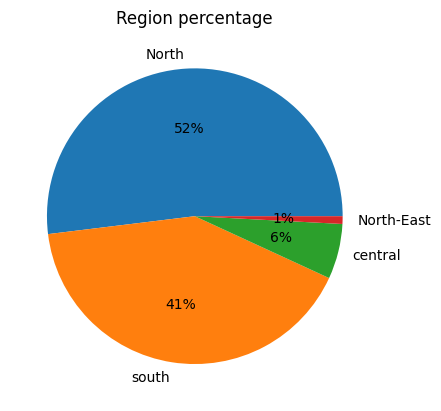

In [ ]:
y = x.values.round(2)
mylabels = list(x.index)

plt.pie(y, labels = mylabels, autopct='%1.0f%%', pctdistance=.6, labeldistance=1.1)
plt.title("Region percentage")
plt.show()

In [ ]:
x=(dataset1["gender"].value_counts()/len(dataset1))*100
x.values.round(2)

array([29.15, 26.98, 23.65, 20.22])

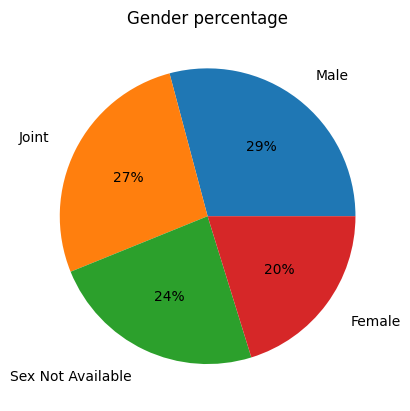

In [ ]:
y = x.values.round(2)
mylabels = list(x.index)

plt.pie(y, labels = mylabels, autopct='%1.0f%%', pctdistance=.6, labeldistance=1.2)
plt.title("Gender percentage")
plt.show()

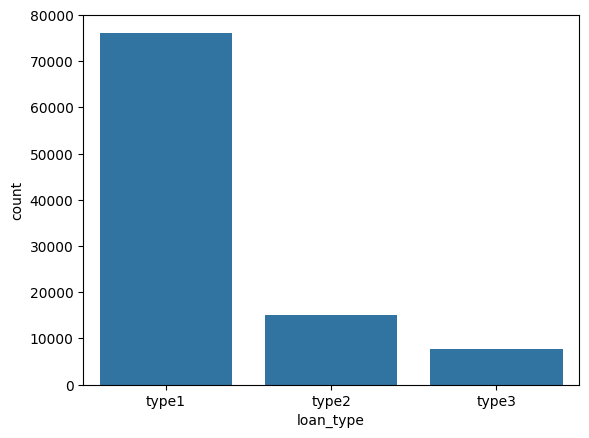

In [ ]:
sns.countplot(data=dataset1 , x='loan_type')
plt.show()

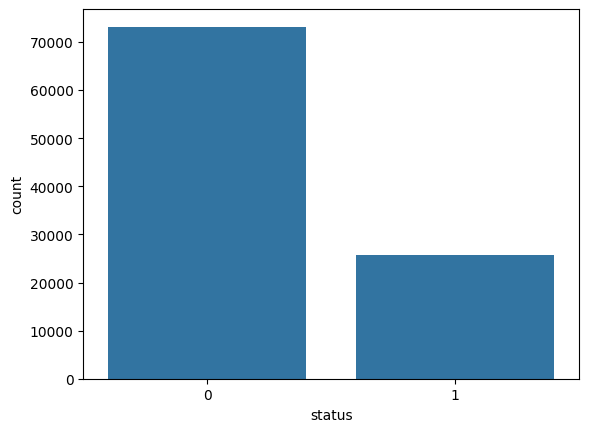

In [ ]:
sns.countplot(data=dataset1 , x='status')
plt.show()

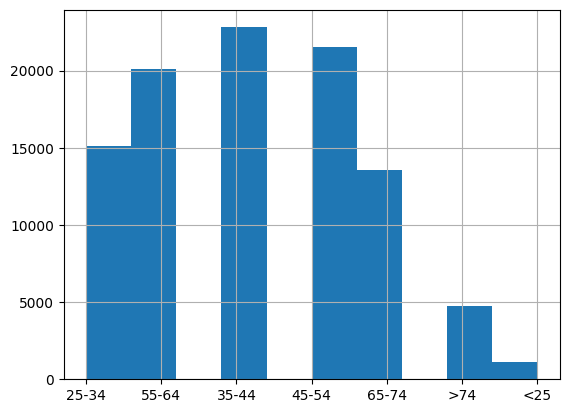

In [ ]:
dataset1['age'].hist() 
plt.show()

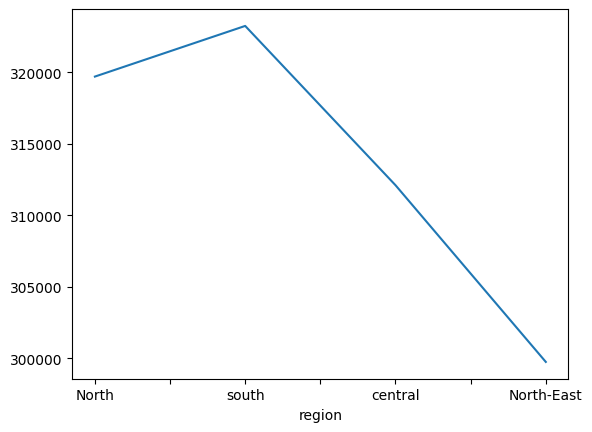

In [ ]:
dataset1.groupby('region').agg({'income':'mean',"loan_amount":'mean'}).sort_values("income",ascending=False).head(5)["loan_amount"].plot(kind='line')
plt.show()

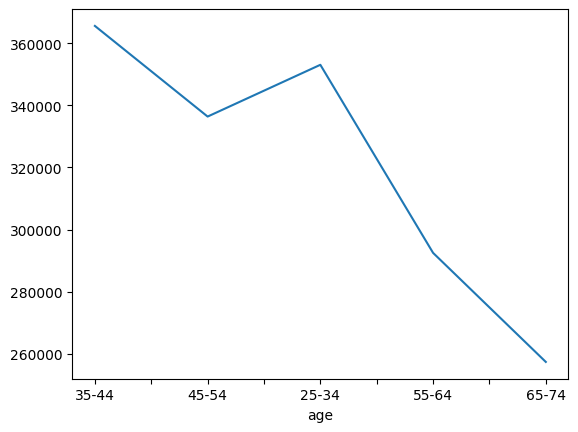

In [ ]:
dataset1.groupby('age').agg({'income':'mean',"loan_amount":'mean'}).sort_values("income",ascending=False).head(5)["loan_amount"].plot(kind='line')
plt.show()

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98946 entries, 24890 to 173556
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       98946 non-null  int64  
 1   loan_limit                 98946 non-null  object 
 2   gender                     98946 non-null  object 
 3   approv_in_adv              98946 non-null  object 
 4   loan_type                  98946 non-null  object 
 5   loan_purpose               98946 non-null  object 
 6   credit_worthiness          98946 non-null  object 
 7   open_credit                98946 non-null  object 
 8   business_or_commercial     98946 non-null  object 
 9   loan_amount                98946 non-null  int64  
 10  upfront_charges            98946 non-null  float64
 11  term                       98946 non-null  float64
 12  neg_ammortization          98946 non-null  object 
 13  interest_only              98946 non-null  obj

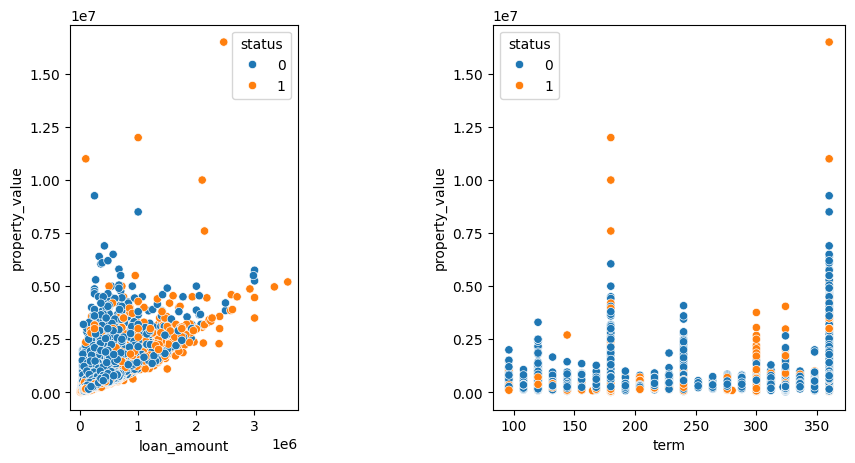

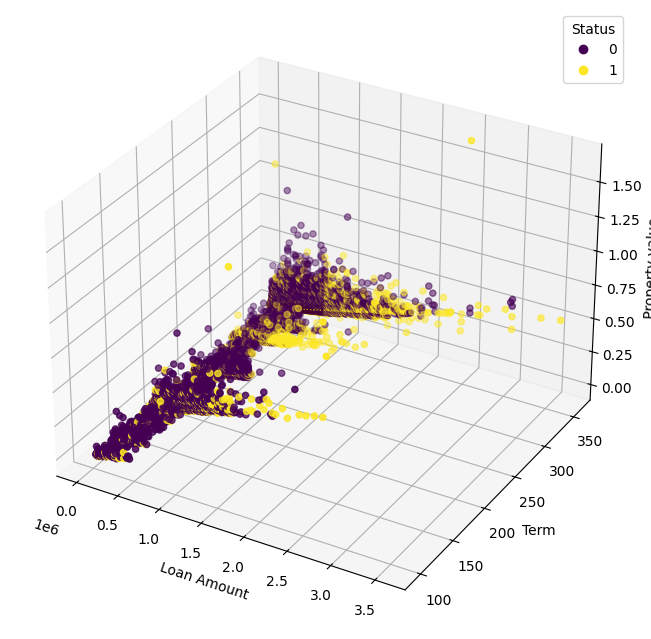

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plots

plt.figure(figsize=(10, 5))

# Plot 1: loan_amount vs rate_of_interest with hue=status
plt.subplot(131)
sns.scatterplot(data=dataset, x='loan_amount', y='property_value', hue='status')

# Plot 2: term vs rate_of_interest with hue=status
plt.subplot(122)
sns.scatterplot(data=dataset, x='term', y='property_value', hue='status')

# Plot 3: 3D scatter plot
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(dataset.loan_amount, dataset.term, dataset.property_value, c=dataset.status)
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Term')
ax.set_zlabel('Property value')
plt.legend(*scatter.legend_elements(), title='Status')
plt.show()


# Modelling and Evaluation

## Models ( Classification )

In [ ]:
#import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Correlation heatmap of the dataset')

<Figure size 1500x1500 with 0 Axes>

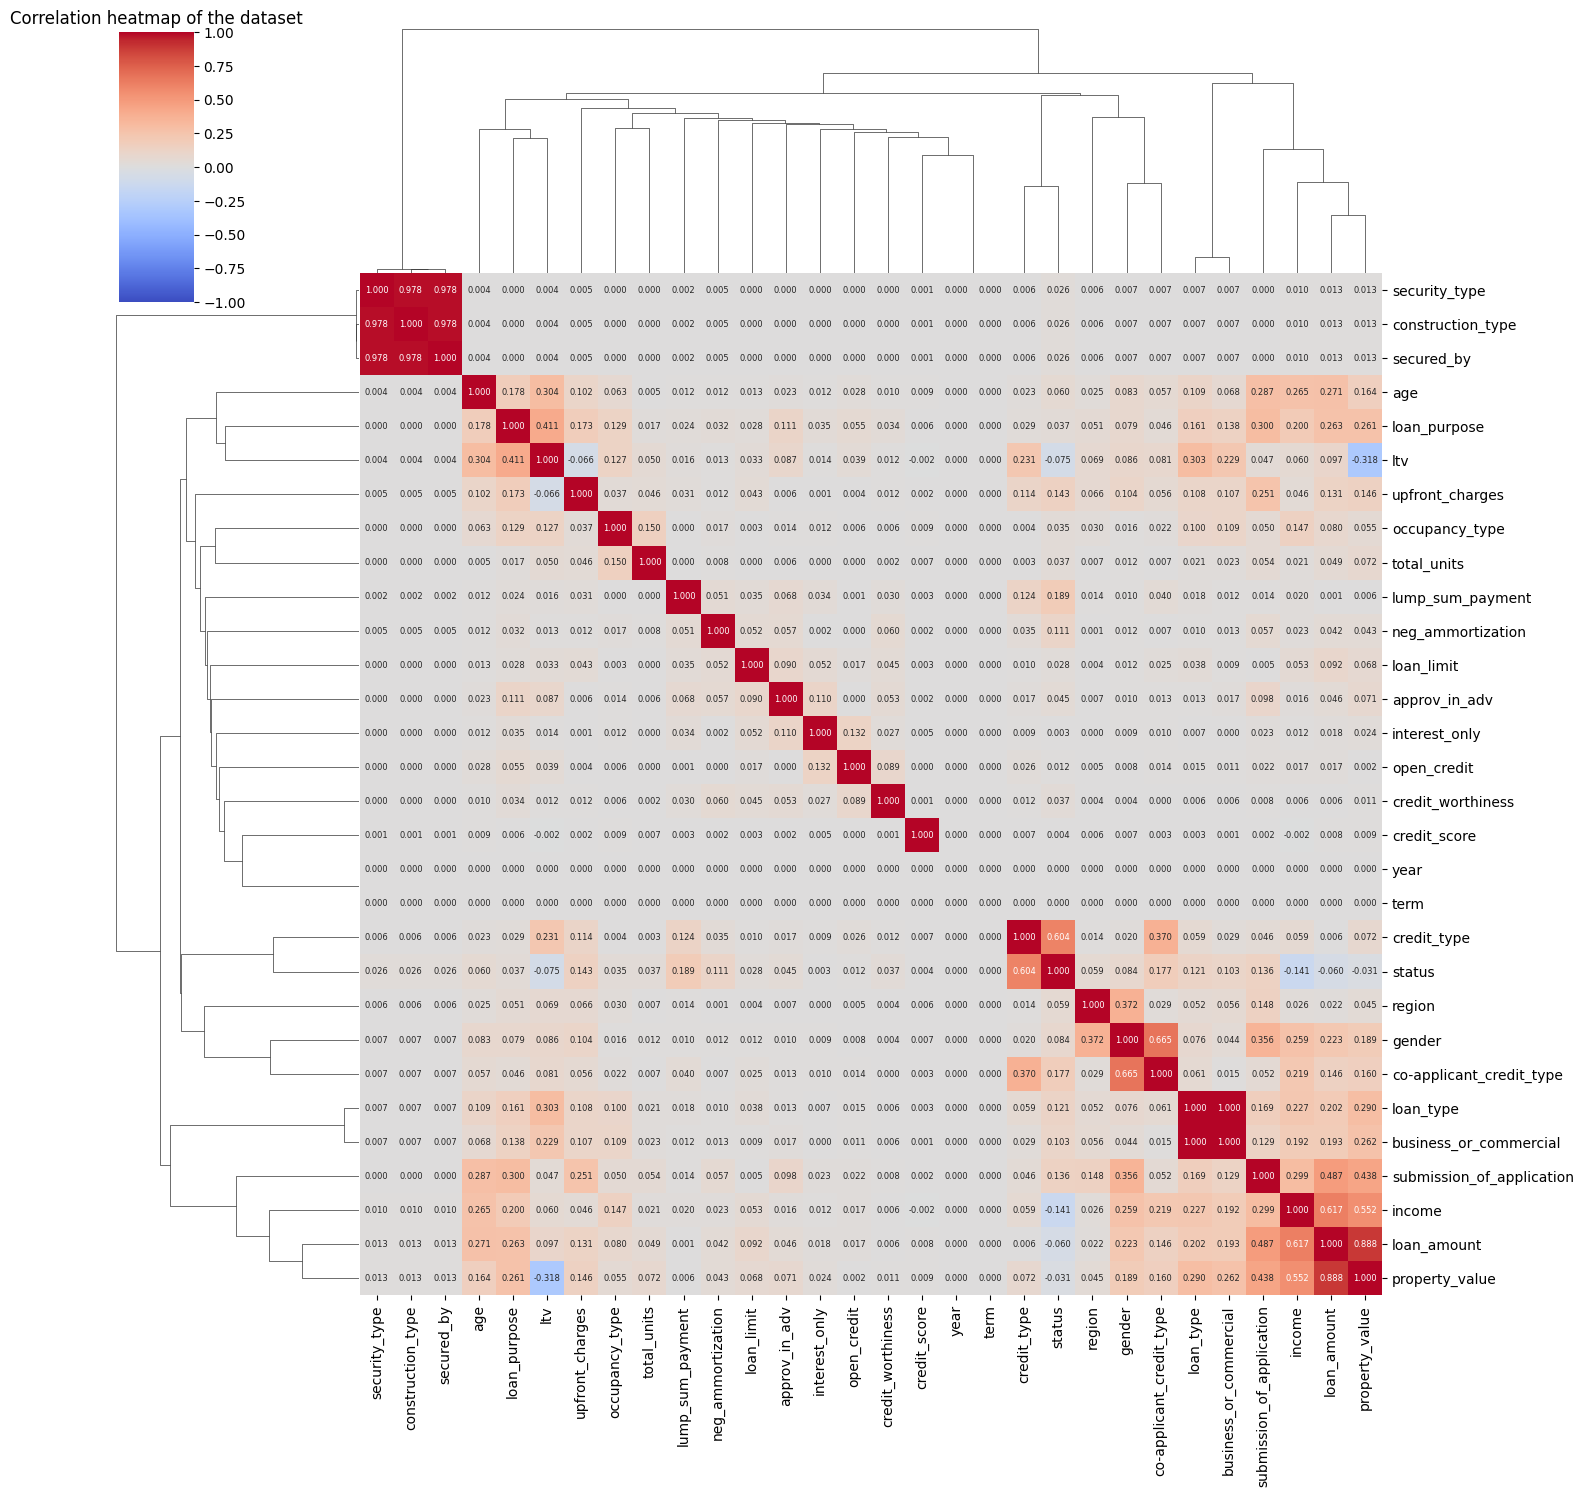

In [ ]:
corr_matrix = associations(
  dataset1,
  compute_only=True
)
df_complete_corr = corr_matrix['corr']

plt.figure(figsize=(15, 15))
sns.clustermap(
  df_complete_corr,
  cmap='coolwarm',
  annot=True, 
  annot_kws={"fontsize":6},
  fmt=".3f",
  vmin=-1.0,
  figsize=(15, 15)
  )
plt.title("Correlation heatmap of the dataset")

In [ ]:
# Drop correlated variables
model_dataset = dataset1.drop(columns=[
  'year',
  'business_or_commercial',
  'property_value',
  'gender',
  'income',
  'ltv',
  'submission_of_application'
])
model_dataset.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Correlation heatmap of the dataset')

<Figure size 1500x1500 with 0 Axes>

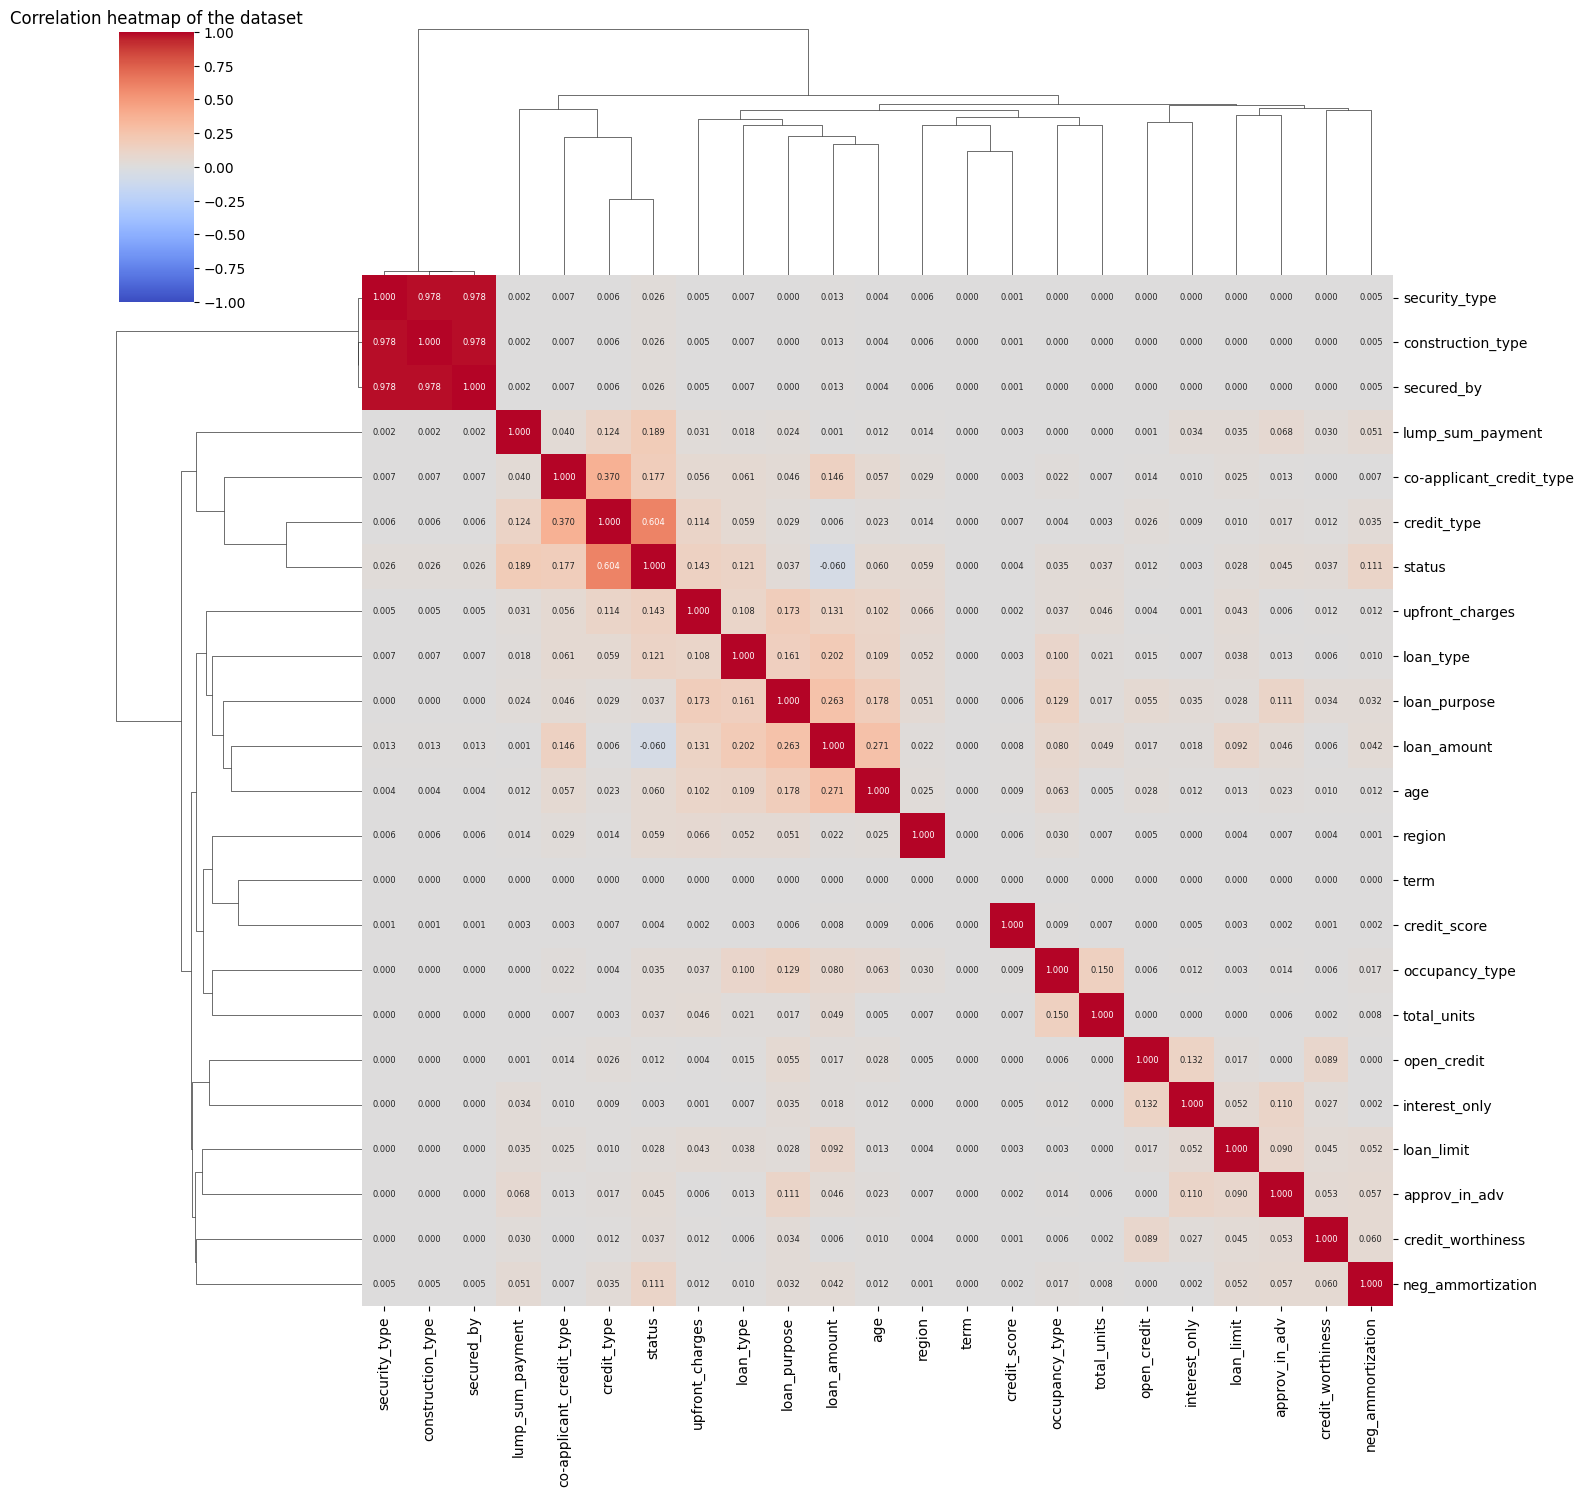

In [ ]:
corr_matrix = associations(
  model_dataset,
  compute_only=True
)
df_complete_corr = corr_matrix['corr']

plt.figure(figsize=(15, 15))
sns.clustermap(
  df_complete_corr,
  cmap='coolwarm',
  annot=True, 
  annot_kws={"fontsize":6},
  fmt=".3f",
  vmin=-1.0,
  figsize=(15, 15)
  )
plt.title("Correlation heatmap of the dataset")

In [ ]:
categorical_cols = []
numerical_cols = []
for col in model_dataset.columns:
    if(model_dataset[col].dtype == 'object'):
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [ ]:
print('Categorical columns: \n', categorical_cols)
print('\n')
print('Numerical columns: \n', numerical_cols)

Categorical columns: 
 ['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'region', 'security_type']


Numerical columns: 
 ['loan_amount', 'upfront_charges', 'term', 'credit_score', 'status']


## Data Preprocessing

In [ ]:
# Categorical feature preparation

model_dataset['is_cf'] = model_dataset['loan_limit'].replace({'unknown': -1, 'ncf': 0, 'cf': 1})

model_dataset['is_approv_in_adv'] = model_dataset['approv_in_adv'].replace({'unknown': -1, 'nopre': 0, 'pre': 1})

# model_dataset['is_for_b/c'] = model_dataset['business_or_commercial'].replace({'nob/c': 0, 'b/c': 1})

model_dataset['is_neg_ammortization'] = model_dataset['neg_ammortization'].replace({'unknown': -1, 'not_neg': 0, 'neg_amm': 1})

model_dataset['is_not_lpsm'] = model_dataset['lump_sum_payment'].replace({'not_lpsm': 0, 'lpsm': 1})

model_dataset['is_exp'] = model_dataset['co-applicant_credit_type'].replace({'EXP': 1, 'CIB': 0})

ohe_loan_type = model_dataset['loan_type'].str.get_dummies()
model_dataset = pd.concat([model_dataset, ohe_loan_type], axis=1)

ohe_loan_purpose = model_dataset['loan_purpose'].str.get_dummies()
model_dataset = pd.concat([model_dataset, ohe_loan_purpose], axis=1)

ohe_credit_type = model_dataset['credit_type'].str.get_dummies()
model_dataset = pd.concat([model_dataset, ohe_credit_type], axis=1)

ohe_occupancy_type = model_dataset['occupancy_type'].str.get_dummies()
model_dataset = pd.concat([model_dataset, ohe_occupancy_type], axis=1)

ohe_age = model_dataset['age'].str.get_dummies()
model_dataset = pd.concat([model_dataset, ohe_age], axis=1)

ohe_region = model_dataset['region'].str.get_dummies()
model_dataset = pd.concat([model_dataset, ohe_region], axis=1)

model_dataset.drop(categorical_cols, axis=1, inplace=True)

In [ ]:
model_dataset.tail(10)

loan_amount  upfront_charges   term  credit_score  status  is_cf  \
98936       136500      4444.130000  360.0           654       0      1   
98937       216500         0.000000  360.0           530       0      1   
98938       226500         0.000000  360.0           665       0      1   
98939       386500      4784.224695  360.0           669       1      1   
98940       416500      5687.910000  360.0           520       0      1   
98941       366500      3643.160000  360.0           851       0      1   
98942       646500      7639.800000  360.0           873       0      1   
98943       106500      1318.292186  360.0           619       1      1   
98944       156500      3113.060000  360.0           859       0      1   
98945       586500         0.000000  360.0           569       0      1   

       is_approv_in_adv  is_neg_ammortization  is_not_lpsm  is_exp  ...  \
98936                 0                     0            0       0  ...   
98937                 0                     0            0       1  ...   
98938                 0                     1            0       0  ...   
98939                 0                     0            0       1  ...   
98940                 0                     1            0       1  ...   
98941                 0                     0            0       1  ...   
98942                 0                     0            0       1  ...   
98943                 0                     0            0       1  ...   
98944                 0                     0            0       1  ...   
98945                 0                     0            0       0  ...   

       35-44  45-54  55-64  65-74  <25  >74  North  North-East  central  south  
98936      0      0      1      0    0    0      1           0        0      0  
98937      0      0      1      0    0    0      1           0        0      0  
98938      0      1      0      0    0    0      0           0        0      1  
98939      0      0      0      0    0    0      0           0        0      1  
98940      0      0      0      1    0    0      0           0        0      1  
98941      0      1      0      0    0    0      1           0        0      0  
98942      0      1      0      0    0    0      1           0        0      0  
98943      0      0      0      0    1    0      1           0        0      0  
98944      0      0      0      1    0    0      0           0        1      0  
98945      0      0      0      0    0    0      0           0        0      1  

[10 rows x 36 columns]

# Data Modeling Part 2

## Random Forest Classification

In [ ]:
# Split data for model implementation
prediction_features = model_dataset.drop('status', axis=1)
predictor_feature = model_dataset['status']

train_set_predictors, test_set_predictors, train_set_results, test_set_original_results = train_test_split(prediction_features, predictor_feature, test_size=0.25)

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(train_set_predictors, train_set_results)

RandomForestClassifier()

In [ ]:
test_set_pred_results = rf_model.predict(test_set_predictors)

### RF model result and evaluation 

In [ ]:
#model evaluation type 1
report = classification_report(test_set_original_results, test_set_pred_results)
print(report)


              precision    recall  f1-score   support

           0       0.89      0.97      0.93     18291
           1       0.90      0.65      0.75      6446

    accuracy                           0.89     24737
   macro avg       0.89      0.81      0.84     24737
weighted avg       0.89      0.89      0.88     24737



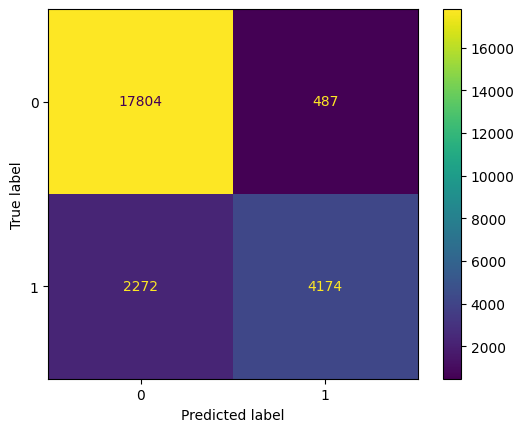

In [ ]:
#model evaluation type 2
cm = confusion_matrix(test_set_original_results, test_set_pred_results)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

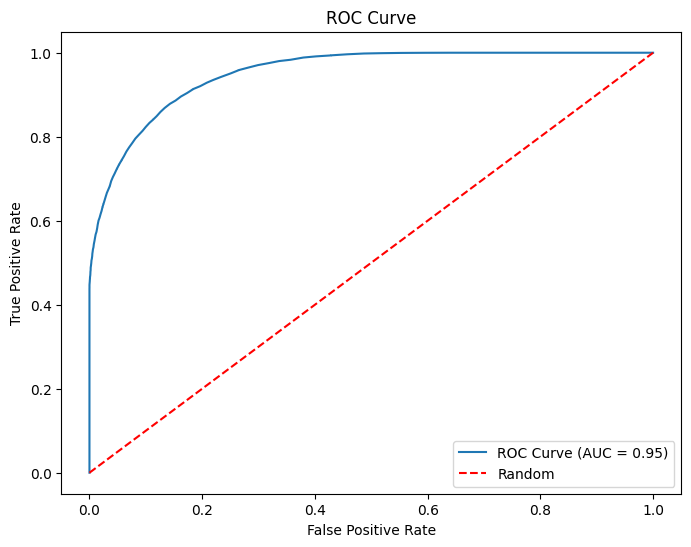

In [ ]:
#model evaluation type 3
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
probs = rf_model.predict_proba(test_set_predictors)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_set_original_results, probs)
auc = roc_auc_score(test_set_original_results, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


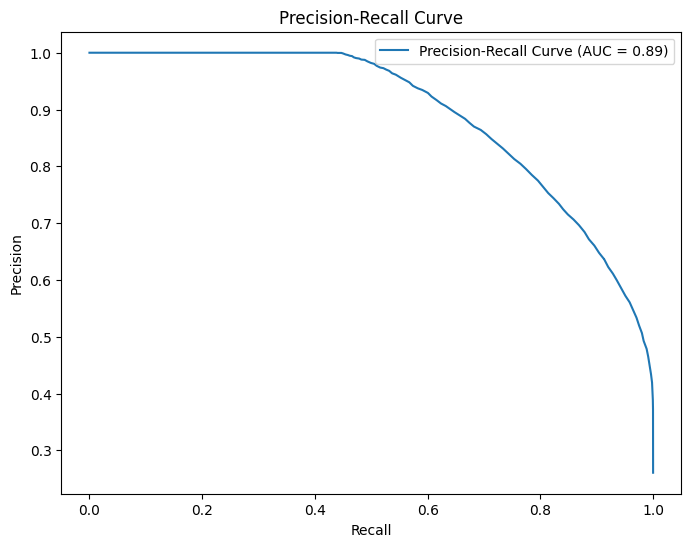

In [ ]:
#model evaluation type 4
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute precision-recall curve and area under curve
precision, recall, _ = precision_recall_curve(test_set_original_results, probs)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
#model evaluation type 5
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Compute F1 score
f1 = f1_score(test_set_original_results, test_set_pred_results)
print(f'F1 Score: {f1:.2f}')

# Compute accuracy
accuracy = accuracy_score(test_set_original_results, test_set_pred_results)
print(f'Accuracy: {accuracy:.2f}')

F1 Score: 0.75
Accuracy: 0.89


In [ ]:
#model evaluation type 6
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': prediction_features.columns, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

                 Feature  Importance
1        upfront_charges    0.236709
19                  EQUI    0.225789
0            loan_amount    0.145142
3           credit_score    0.118879
20                   EXP    0.035155
17                   CIB    0.030321
8                 is_exp    0.023984
7            is_not_lpsm    0.023908
18                  CRIF    0.023273
6   is_neg_ammortization    0.013311
5       is_approv_in_adv    0.012413
4                  is_cf    0.011646
15                    p4    0.007947
9                  type1    0.007739
10                 type2    0.006920
27                 55-64    0.006688
26                 45-54    0.006660
14                    p3    0.006653
25                 35-44    0.006494
12                    p1    0.006237
28                 65-74    0.006123
31                 North    0.005526
34                 south    0.005327
24                 25-34    0.005262
30                   >74    0.003885
33               central    0.003667
2

# Statistical Analysis

In [ ]:
model_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98946 entries, 0 to 98945
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amount           98946 non-null  int64  
 1   upfront_charges       98946 non-null  float64
 2   term                  98946 non-null  float64
 3   credit_score          98946 non-null  int64  
 4   status                98946 non-null  int64  
 5   is_cf                 98946 non-null  int64  
 6   is_approv_in_adv      98946 non-null  int64  
 7   is_neg_ammortization  98946 non-null  int64  
 8   is_not_lpsm           98946 non-null  int64  
 9   is_exp                98946 non-null  int64  
 10  type1                 98946 non-null  int64  
 11  type2                 98946 non-null  int64  
 12  type3                 98946 non-null  int64  
 13  p1                    98946 non-null  int64  
 14  p2                    98946 non-null  int64  
 15  p3                 

## correlation analysis

In [ ]:
# seperating numerical data to another dataset 
numerical_data = dataset1.select_dtypes(include=['number'])

In [ ]:
# seperating categorical data to another dataset
categorical_data2 = dataset1.select_dtypes(include=['object'])

In [ ]:
# Perform label encoding for each column
for column in categorical_data2.columns:
    categorical_data2[column] = pd.factorize(categorical_data2[column])[0]

# Convert columns to integer type
categorical_data2 = categorical_data2.astype(int)

In [ ]:
numerical_data['Median'] = numerical_data[['year', 'upfront_charges', 'property_value', 'income', 'credit_score', 'ltv', 'status']].median(axis=1)


In [ ]:
numerical_data.describe()

year    loan_amount  upfront_charges     term  property_value  \
count  98946.0   98946.000000     98946.000000  98946.0    9.894600e+04   
mean    2019.0  320523.507772      3183.318813    360.0    4.449380e+05   
std        0.0  153580.669670      2462.204441      0.0    2.241523e+05   
min     2019.0   16500.000000         0.000000    360.0    2.800000e+04   
25%     2019.0  206500.000000      1172.455000    360.0    2.680000e+05   
50%     2019.0  296500.000000      2909.420000    360.0    4.080000e+05   
75%     2019.0  426500.000000      4793.907500    360.0    5.880000e+05   
max     2019.0  796500.000000     10537.500000    360.0    1.151262e+06   

             income  credit_score           ltv        status        Median  
count  98946.000000  98946.000000  98946.000000  98946.000000  98946.000000  
mean    5830.846522    699.603824     74.480174      0.260536   1624.029056  
std     3010.537404    115.889512     15.268346      0.438929    550.787138  
min        0.000000    500.000000     32.175090      0.000000    120.000000  
25%     3540.000000    599.000000     64.756944      0.000000   1074.925000  
50%     5340.000000    699.000000     74.686520      0.000000   2019.000000  
75%     7680.000000    800.000000     86.073826      1.000000   2019.000000  
max    14700.000000    900.000000    117.708333      1.000000   2019.000000

In [ ]:
categorical_data2.describe()

loan_limit        gender  approv_in_adv     loan_type  loan_purpose  \
count  98946.000000  98946.000000   98946.000000  98946.000000  98946.000000   
mean       0.124775      1.437744       0.181776      0.308330      1.137823   
std        0.456900      1.059907       0.401707      0.608474      0.863494   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      1.000000       0.000000      0.000000      0.000000   
50%        0.000000      1.000000       0.000000      0.000000      1.000000   
75%        0.000000      2.000000       0.000000      0.000000      2.000000   
max        2.000000      3.000000       2.000000      2.000000      4.000000   

       credit_worthiness   open_credit  business_or_commercial  \
count       98946.000000  98946.000000            98946.000000   
mean            0.034868      0.000829                0.151355   
std             0.183445      0.028776                0.358397   
min             0.000000      0.000000                0.000000   
25%             0.000000      0.000000                0.000000   
50%             0.000000      0.000000                0.000000   
75%             0.000000      0.000000                0.000000   
max             1.000000      1.000000                1.000000   

       neg_ammortization  interest_only  ...  construction_type  \
count       98946.000000   98946.000000  ...       98946.000000   
mean            0.094971       0.044610  ...           0.000232   
std             0.296194       0.206447  ...           0.015245   
min             0.000000       0.000000  ...           0.000000   
25%             0.000000       0.000000  ...           0.000000   
50%             0.000000       0.000000  ...           0.000000   
75%             0.000000       0.000000  ...           0.000000   
max             2.000000       1.000000  ...           1.000000   

       occupancy_type    secured_by   total_units   credit_type  \
count    98946.000000  98946.000000  98946.000000  98946.000000   
mean         0.108504      0.000232      0.016817      1.680472   
std          0.432486      0.015245      0.169479      1.179789   
min          0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000   
50%          0.000000      0.000000      0.000000      2.000000   
75%          0.000000      0.000000      0.000000      3.000000   
max          2.000000      1.000000      3.000000      3.000000   

       co-applicant_credit_type           age  submission_of_application  \
count              98946.000000  98946.000000               98946.000000   
mean                   0.484891      2.173276                   0.383805   
std                    0.499774      1.470955                   0.486314   
min                    0.000000      0.000000                   0.000000   
25%                    0.000000      1.000000                   0.000000   
50%                    0.000000      2.000000                   0.000000   
75%                    1.000000      3.000000                   1.000000   
max                    1.000000      6.000000                   1.000000   

             region  security_type  
count  98946.000000   98946.000000  
mean       0.665040       0.000232  
std        0.627381       0.015245  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        1.000000       0.000000  
75%        1.000000       0.000000  
max        3.000000       1.000000  

[8 rows x 21 columns]

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98946 entries, 24890 to 173556
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       98946 non-null  int64  
 1   loan_limit                 98946 non-null  object 
 2   gender                     98946 non-null  object 
 3   approv_in_adv              98946 non-null  object 
 4   loan_type                  98946 non-null  object 
 5   loan_purpose               98946 non-null  object 
 6   credit_worthiness          98946 non-null  object 
 7   open_credit                98946 non-null  object 
 8   business_or_commercial     98946 non-null  object 
 9   loan_amount                98946 non-null  int64  
 10  upfront_charges            98946 non-null  float64
 11  term                       98946 non-null  float64
 12  neg_ammortization          98946 non-null  object 
 13  interest_only              98946 non-null  obj

In [ ]:
for col in numerical_data:
    print(col, ' : ', numerical_data[col].mode())

year  :  0    2019
Name: year, dtype: int64
loan_amount  :  0    206500
Name: loan_amount, dtype: int64
upfront_charges  :  0    0.0
Name: upfront_charges, dtype: float64
term  :  0    360.0
Name: term, dtype: float64
property_value  :  0    258000.0
Name: property_value, dtype: float64
income  :  0    0.0
Name: income, dtype: float64
credit_score  :  0    867
Name: credit_score, dtype: int64
ltv  :  0    81.25
Name: ltv, dtype: float64
status  :  0    0
Name: status, dtype: int64
Median  :  0    2019.0
Name: Median, dtype: float64


In [ ]:
categorical_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98946 entries, 24890 to 173556
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_limit                 98946 non-null  int64
 1   gender                     98946 non-null  int64
 2   approv_in_adv              98946 non-null  int64
 3   loan_type                  98946 non-null  int64
 4   loan_purpose               98946 non-null  int64
 5   credit_worthiness          98946 non-null  int64
 6   open_credit                98946 non-null  int64
 7   business_or_commercial     98946 non-null  int64
 8   neg_ammortization          98946 non-null  int64
 9   interest_only              98946 non-null  int64
 10  lump_sum_payment           98946 non-null  int64
 11  construction_type          98946 non-null  int64
 12  occupancy_type             98946 non-null  int64
 13  secured_by                 98946 non-null  int64
 14  total_units           

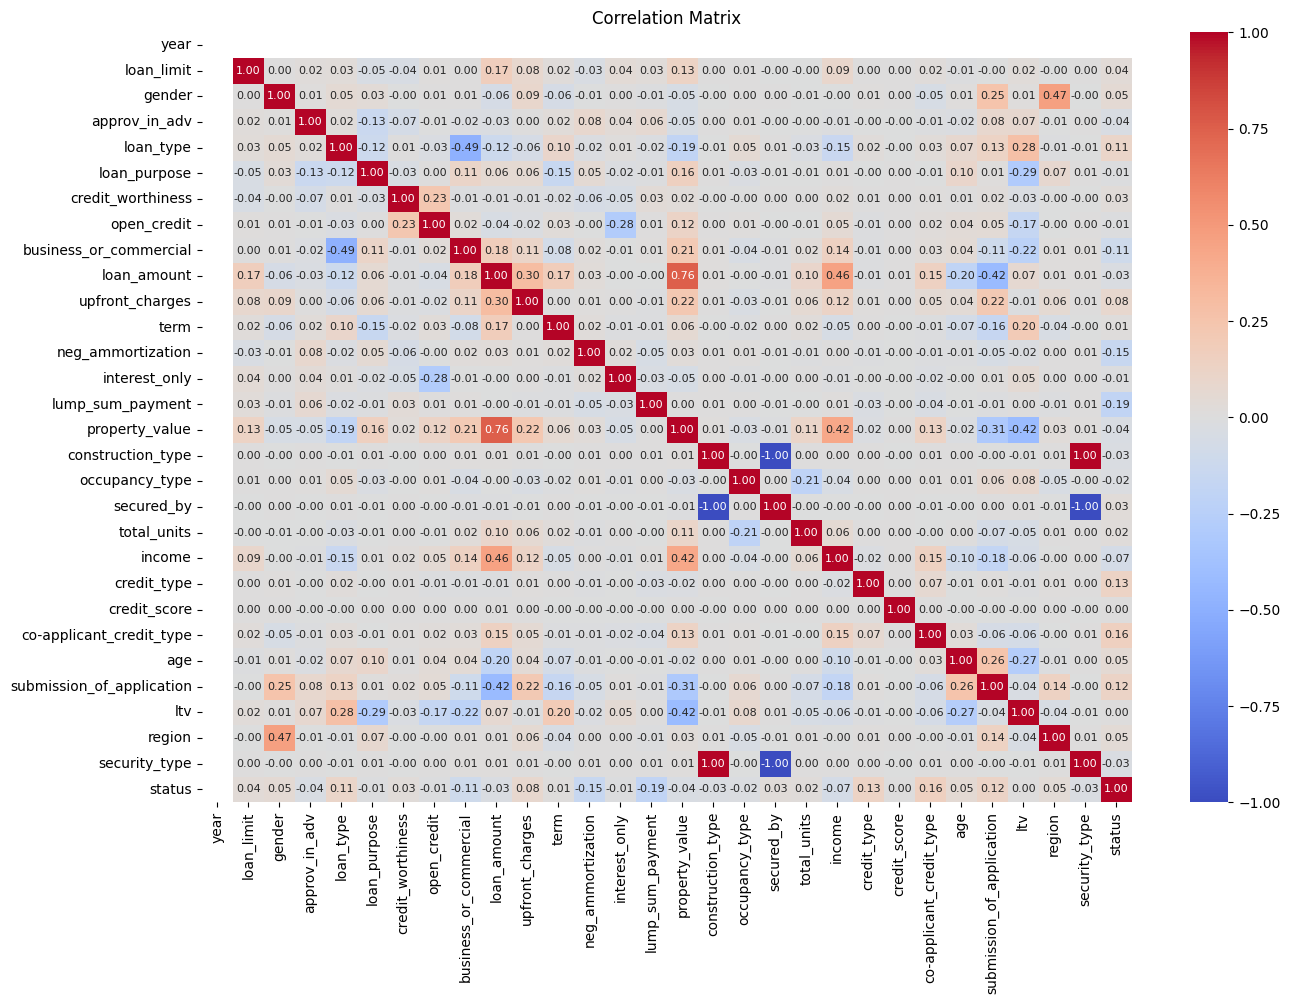

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Load your data from the CSV file
df = dataset

# Encode categorical variables
le = LabelEncoder()
df_encoded = df.copy()
for column in df.select_dtypes(include=['object']).columns:
    df_encoded[column] = le.fit_transform(df[column])

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap for the correlation matrix with clearer annotation
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})
plt.title("Correlation Matrix")
plt.show()

<Axes: >

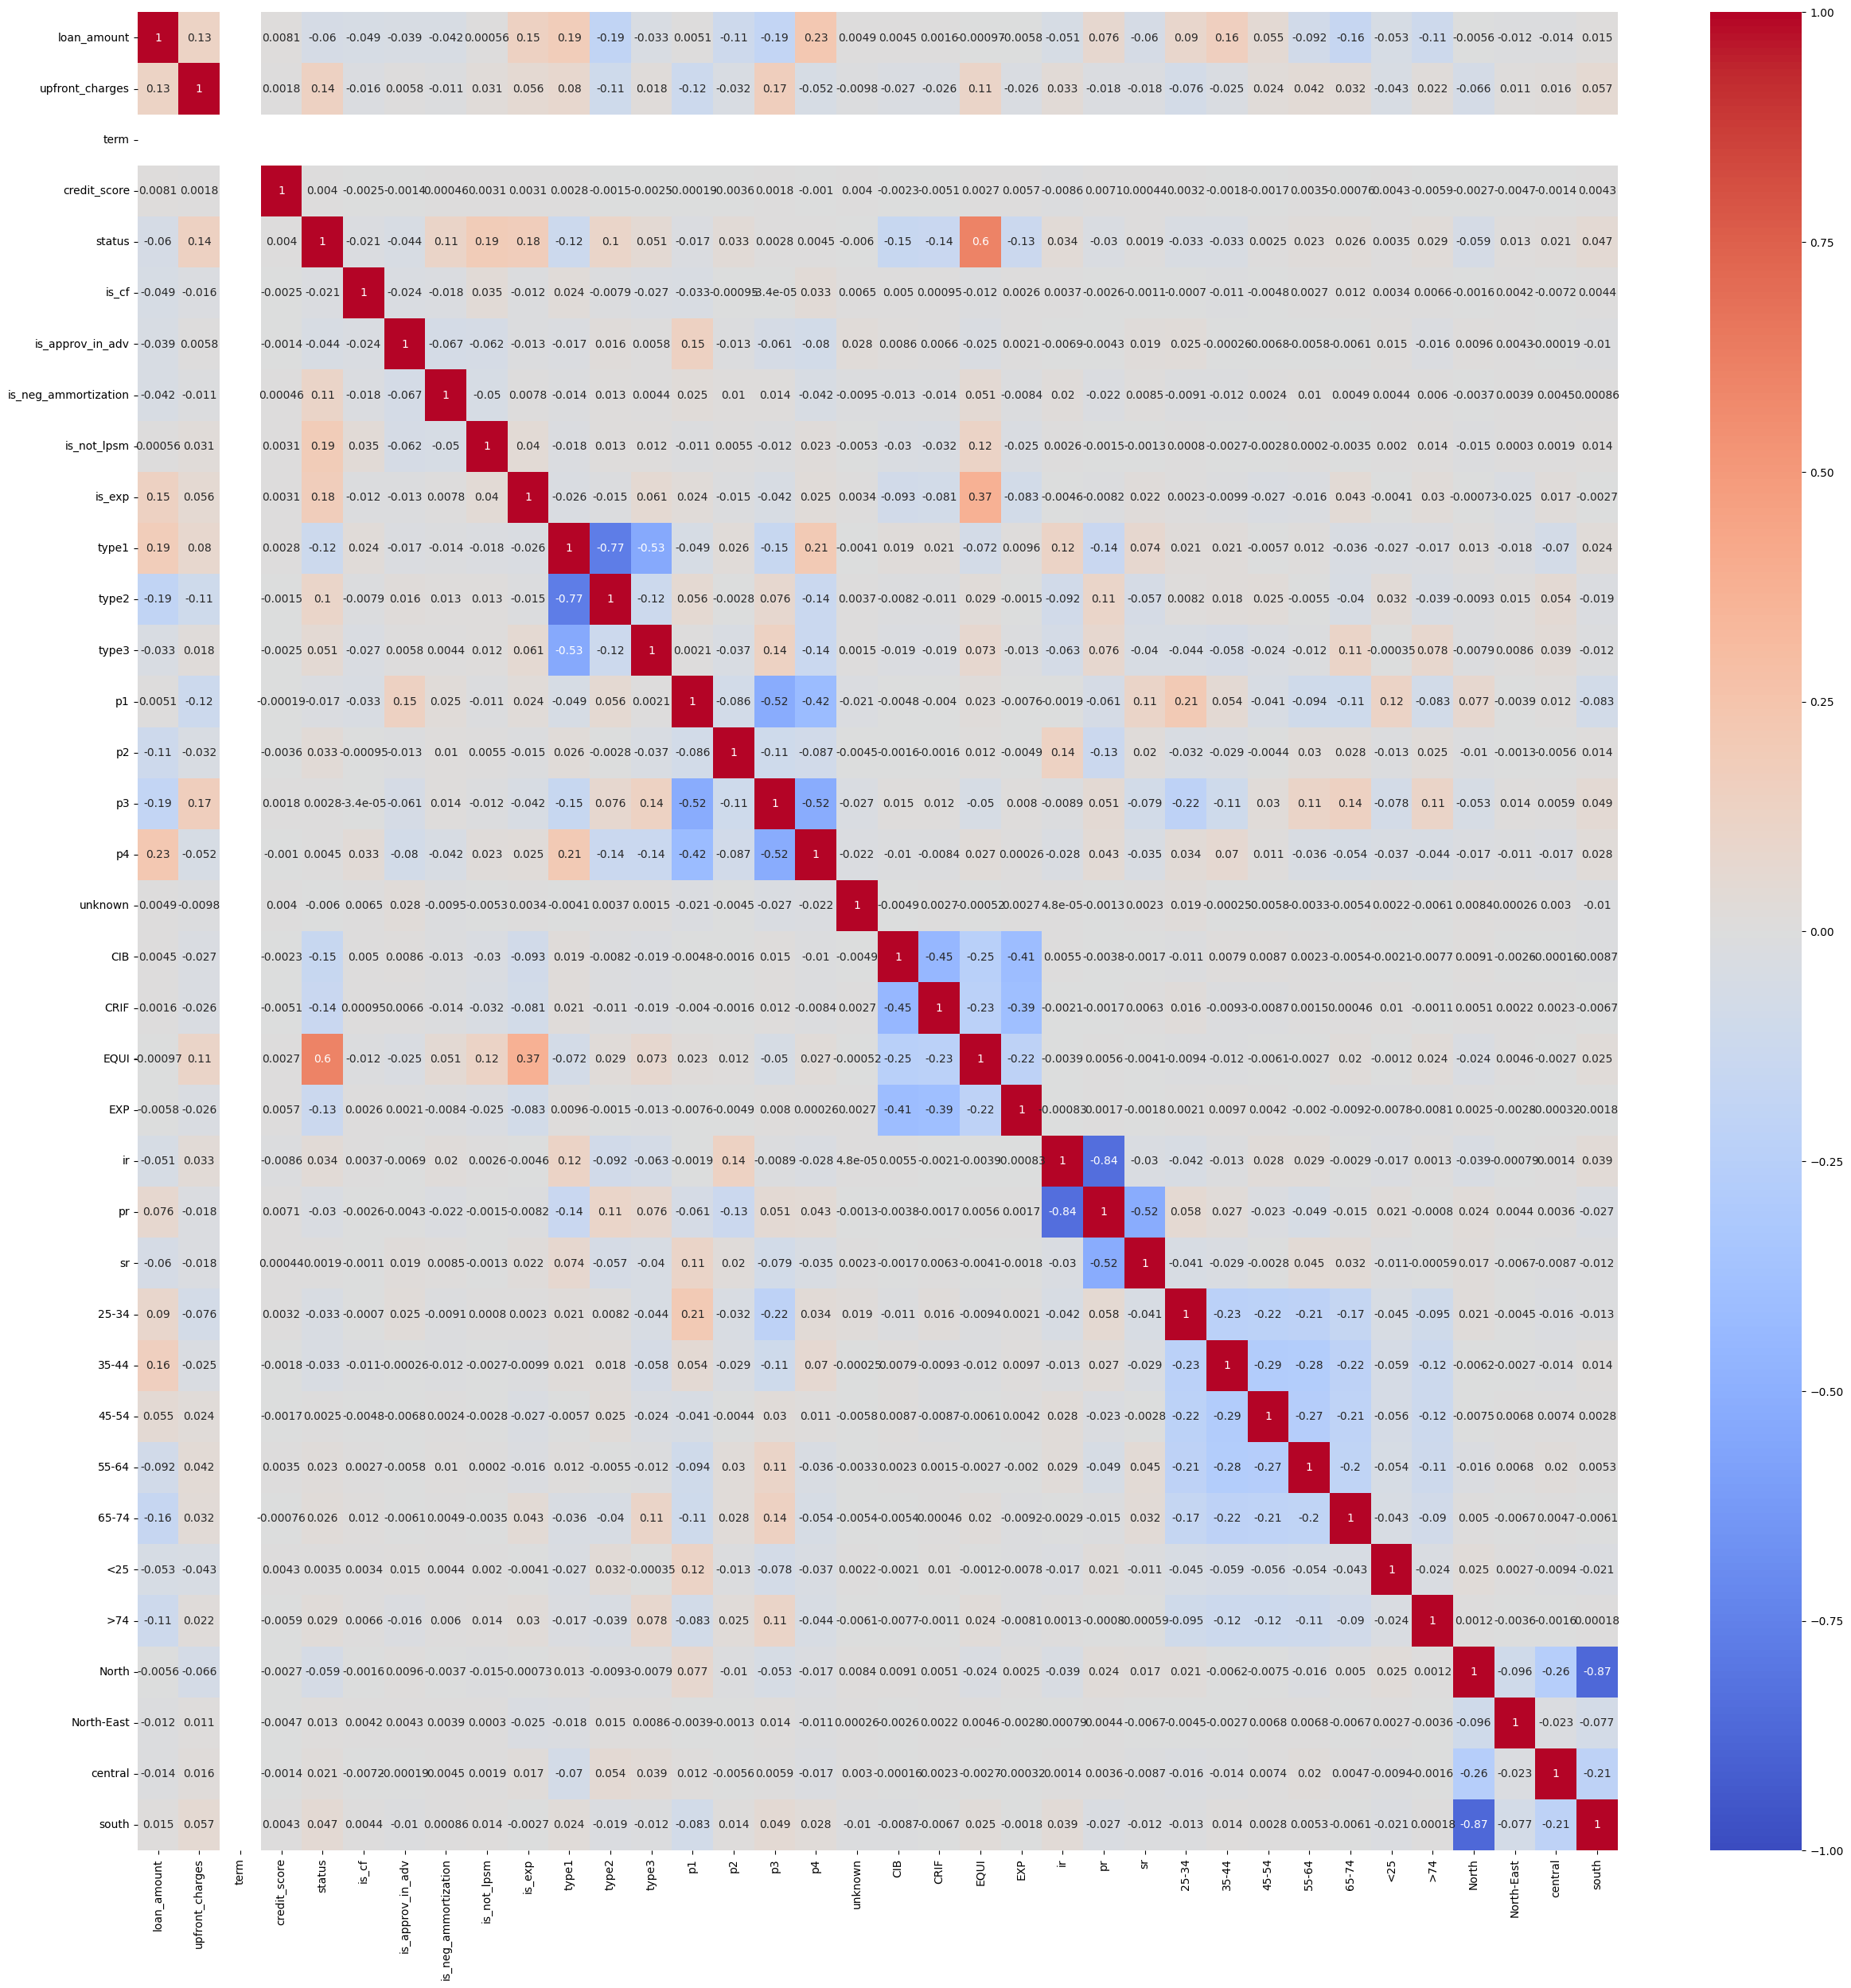

In [ ]:
# correlation analysis
corr = model_dataset.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(data = corr, vmin=-1, vmax=1, annot=True, cmap="coolwarm")

<Axes: >

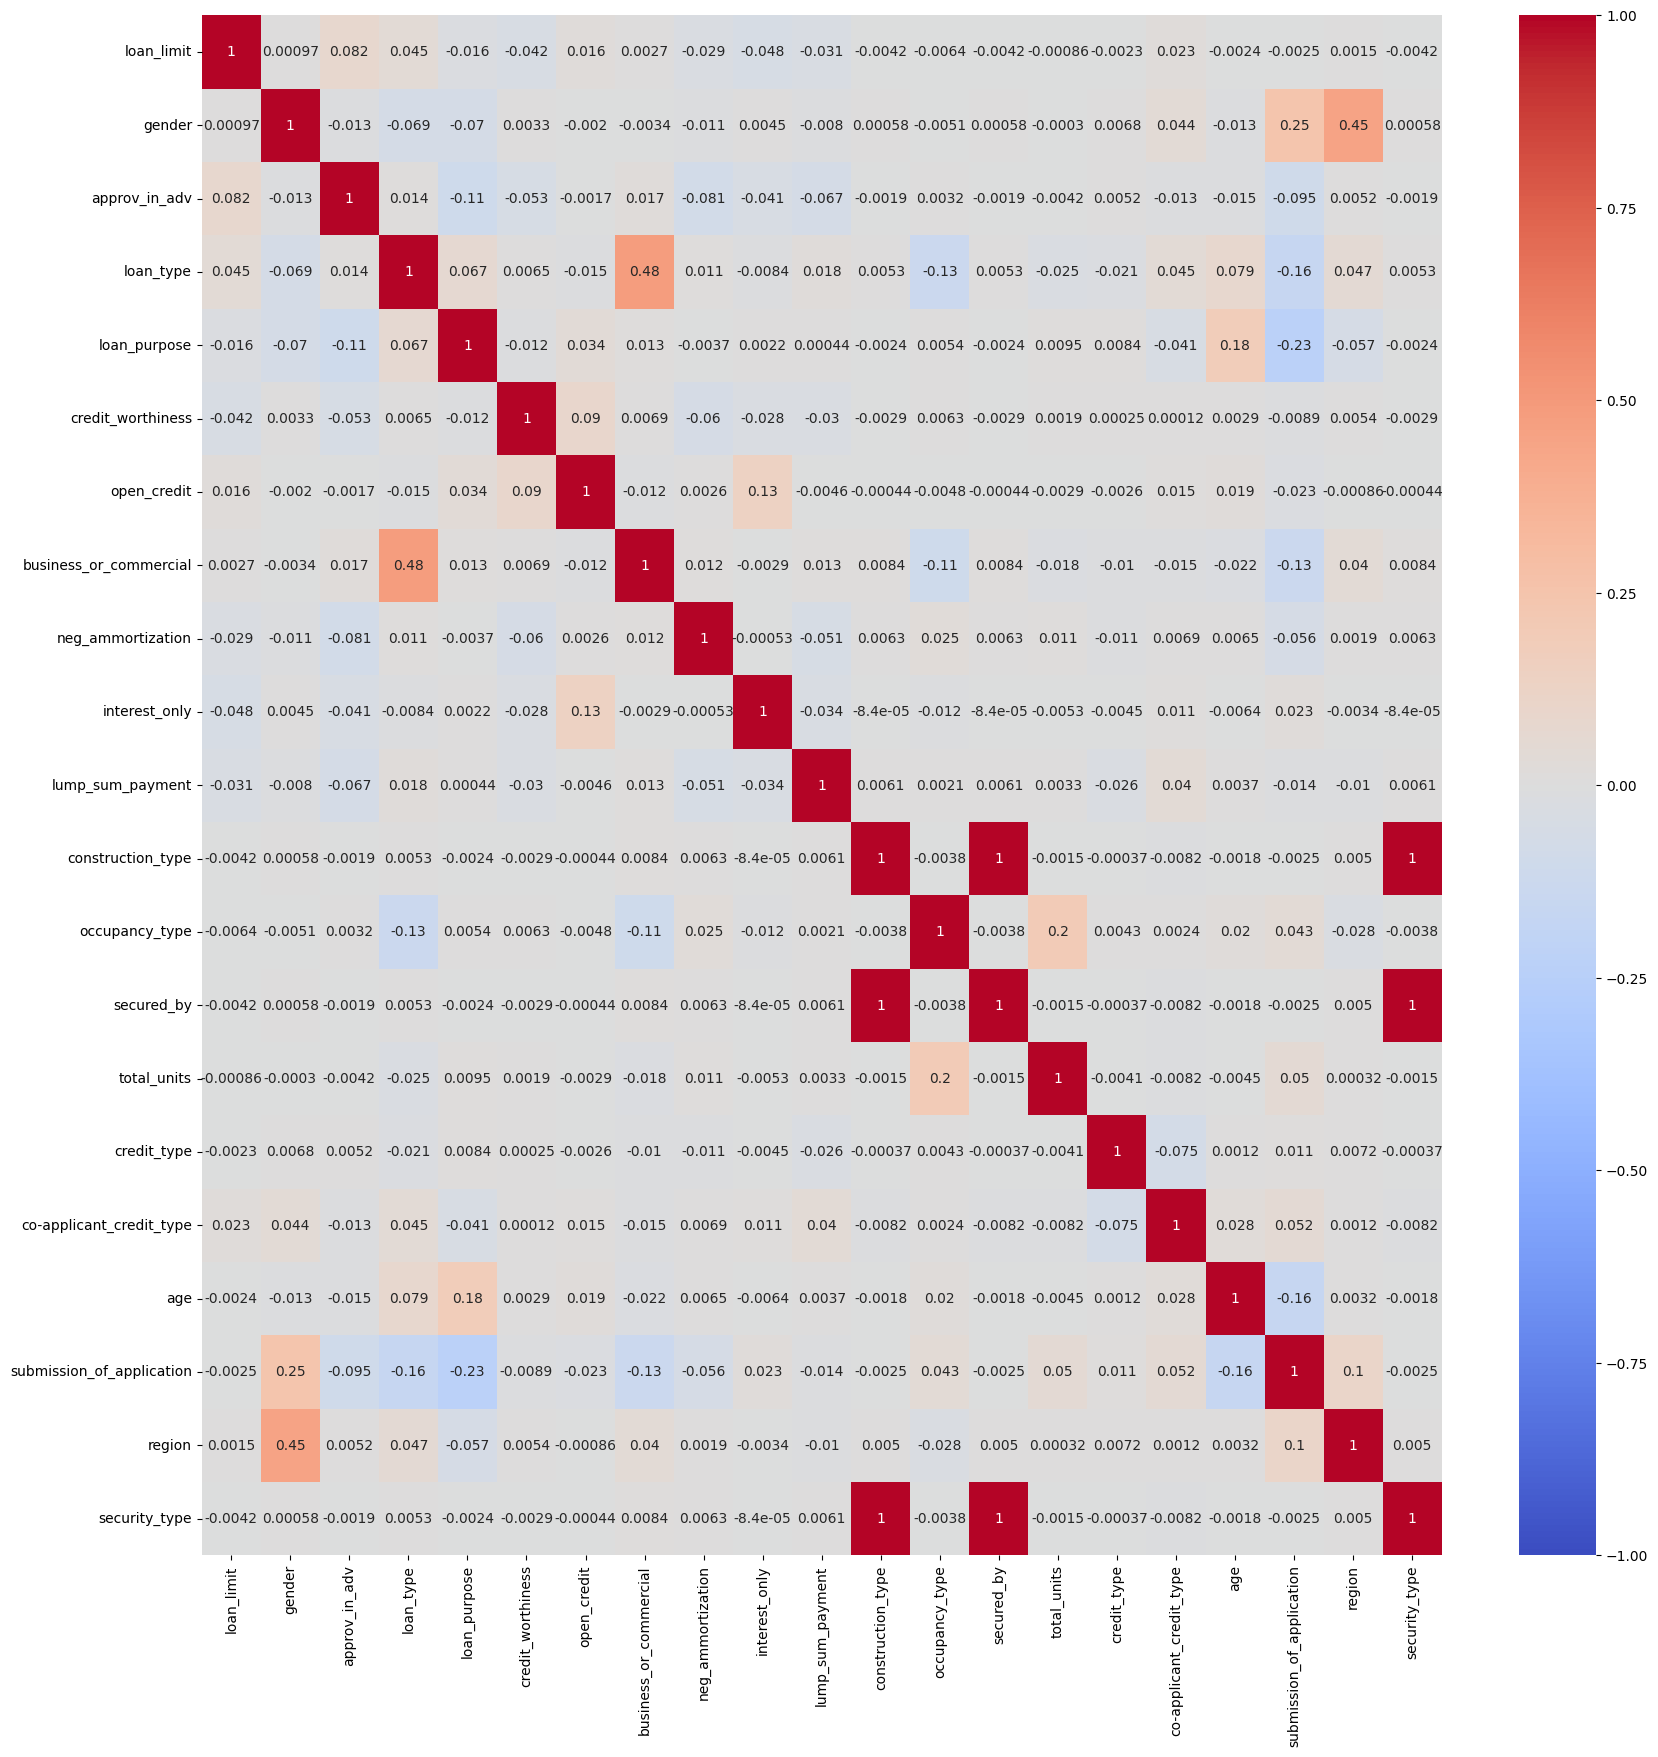

In [ ]:
# correlation analysis for the categorical columns 
corr = categorical_data2.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(data = corr, vmin=-1, vmax=1, annot=True, cmap="coolwarm")

<Axes: >

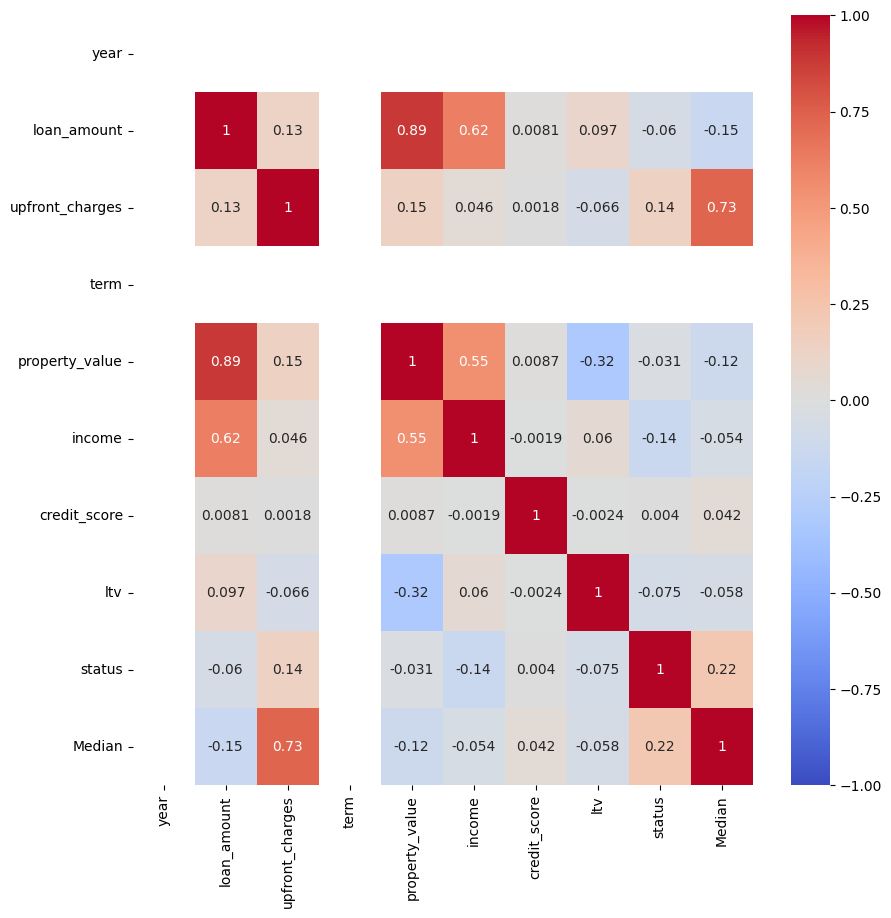

In [ ]:
# correlation analysis for the numerical columns 
corr = numerical_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data = corr, vmin=-1, vmax=1, annot=True, cmap="coolwarm")

# Data Modelling Part 2

## Logistic Regression Model for statistical analysis part 2

In [ ]:
# remove highly inter correlated columns
model_dataset.drop(['North', 'south','type2', 'loan_amount', ], axis=1, inplace = True )

In [ ]:
# split X and y
X = model_dataset.drop(['status'], axis=1)
y = model_dataset['status']

In [ ]:
X.shape

(98946, 31)

In [ ]:
y.shape

(98946,)

In [ ]:
# scaling and PCA for feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y, test_size=0.25)

In [ ]:
# model building and training
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# model predictions
lr_pred = lr_model.predict(X_test)
lr_score = lr_model.score(X_test, y_test)
print(lr_score)

0.8523668997857461


## LR Model  result and evaluation

In [ ]:
# classification report (model evaluation type 1)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     18292
           1       0.93      0.47      0.62      6445

    accuracy                           0.85     24737
   macro avg       0.89      0.73      0.77     24737
weighted avg       0.86      0.85      0.83     24737



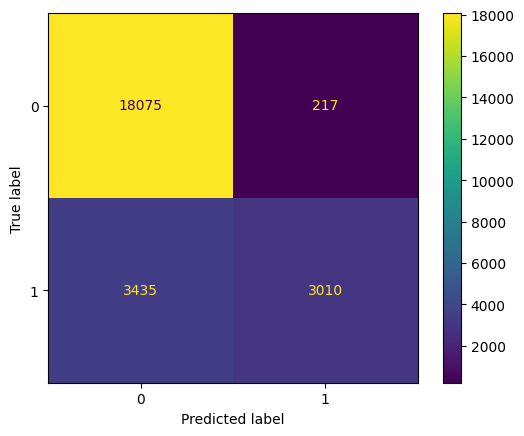

In [ ]:
# confusion matrix (model evaluation type 2)
cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

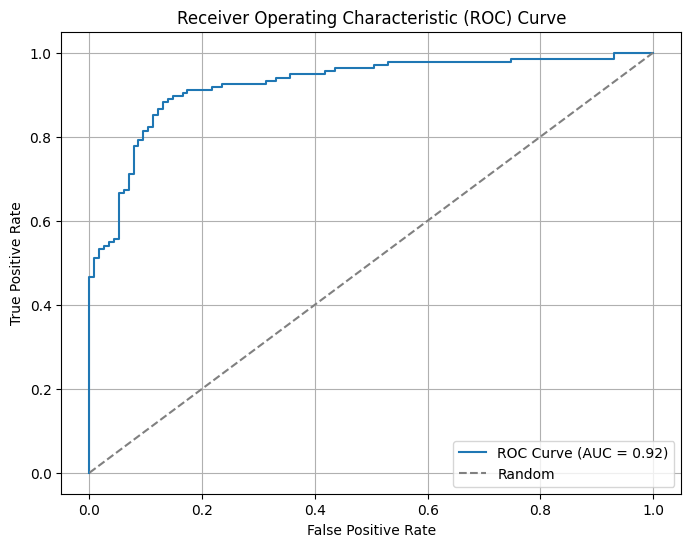

Log-Loss: 0.3611


In [ ]:
#ROC curve and calculate log loss (model evaluation type 3,4)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Calculate log-loss
logloss = log_loss(y_test, y_proba)

print(f'Log-Loss: {logloss:.4f}')


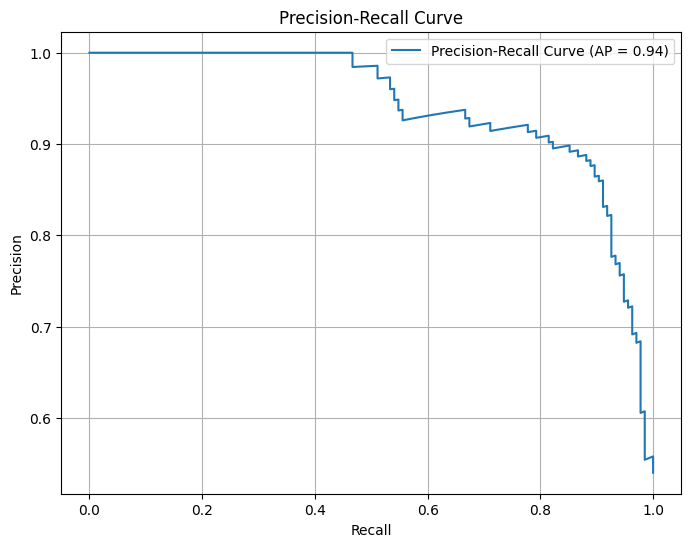

AUC-PR: 0.9412


In [ ]:
#Precision recall curve and average precision score (model evaluation type 5,6)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Area Under the Precision-Recall Curve (AUC-PR)
auc_pr = average_precision_score(y_test, y_proba)

print(f'AUC-PR: {auc_pr:.4f}')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32867af2-f25a-4f20-bdd8-1acd906b0c90' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>